# Project - Cars4U
---

## Context:

- There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. *Cars4U* is a budding tech start-up that aims to find footholes in this market.

- In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

## Objective:

This project is to study the Car sales data and come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. We need to explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

## Key Questions:

1. What are the key factors influencing the prices of used cars?
2. Calculate a regression model to predict the prices of used cars?
2. Arrive at insights and recommendations to help the business.

## Data Information

The records contain the different attributes of vehicles sold in different locations. The detailed data dictionary is given below:

**Data Dictionary**

- S.No.: Serial number
- Name: Name of the car which includes brand name and model name
- Location: Location in which the car is being sold or is available for purchase (cities)
- Year: Manufacturing year of the car
- Kilometers_driven: The total kilometers driven in the car by the previous owner(s) in km
- Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
- Transmission: The type of transmission used by the car (Automatic/Manual)
- Owner: Type of ownership
- Mileage: The standard mileage offered by the car company in kmpl or km/kg
- Engine: The displacement volume of the engine in CC
- Power: The maximum power of the engine in bhp
- Seats: The number of seats in the car
- New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
- Price: The price of the used car in INR Lakhs


---

## Importing the necessary packages:
---

In [1]:
# Importing the Python Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Importing libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# this will help in making the Python code more structured automatically (good coding practice)
!pip install nb-black
%reload_ext nb_black

# Command to tell Python to actually display the graphs
%matplotlib inline

# let's start by installing plotly
!pip install plotly

# importing plotly
import plotly.express as px


# Command to hide the 'already satisfied' warnining from displaying
%pip install keras | grep -v 'already satisfied'

# Constant for making bold text
boldText = "\033[1m"

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 500)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Used for Ignore warnings. When we generate the output, then we can use this ignore warning
import warnings

warnings.filterwarnings("ignore")

Note: you may need to restart the kernel to use updated packages.


<IPython.core.display.Javascript object>

In [2]:
# Loading Used Cars Dataset
df = pd.read_csv("../Dataset/used_cars_data.csv")

# same random results every time
np.random.seed(1)
df.sample(n=10)

# To copy the data to another object
carsData = df.copy()

<IPython.core.display.Javascript object>

---

## Unwrapping the Customer Information:
---

In [3]:
# Command to understand the total number of data collected
print(
    f"- There are {df.shape[0]} row samples and {df.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 7253 row samples and 14 attributes of the customer information collected in this dataset.


<IPython.core.display.Javascript object>

In [4]:
df.head(10)  # Displaying the fist 10 rows of the Dataset

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,10.25,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21.00,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,7.63,1.95


<IPython.core.display.Javascript object>

In [5]:
df.tail(10)  # Displaying the last 10 rows of the Dataset

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
7243,7243,Renault Duster 85PS Diesel RxL,Chennai,2015,70000,Diesel,Manual,First,19.87 kmpl,1461 CC,83.8 bhp,5.0,15.05,NaN
7244,7244,Chevrolet Aveo 1.4 LS,Pune,2009,45463,Petrol,Manual,First,14.49 kmpl,1399 CC,92.7 bhp,5.0,11.30,NaN
7245,7245,Honda Amaze S i-Vtech,Kochi,2015,44776,Petrol,Manual,First,18.0 kmpl,1198 CC,86.7 bhp,5.0,8.54,NaN
7246,7246,Hyundai Grand i10 AT Asta,Coimbatore,2016,18242,Petrol,Automatic,First,18.9 kmpl,1197 CC,82 bhp,5.0,7.45,NaN
7247,7247,Hyundai EON D Lite Plus,Coimbatore,2015,21190,Petrol,Manual,First,21.1 kmpl,814 CC,55.2 bhp,5.0,10.25,NaN
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7252,7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,86.97,NaN


<IPython.core.display.Javascript object>

In [6]:
# Dropping the 'S. No.' column since its not required
df.drop(["S.No."], axis=1, inplace=True)
print("Dropped the 'S.No' attribute since its not required")

Dropped the 'S.No' attribute since its not required


<IPython.core.display.Javascript object>

In [7]:
# Command to understand the total number of data collected
print(
    f"- There are {df.shape[0]} row samples and {df.shape[1]} attributes of the customer information collected in this dataset."
)

- There are 7253 row samples and 13 attributes of the customer information collected in this dataset.


<IPython.core.display.Javascript object>

---

## Performing the Sanity Check
---

In [8]:
# Checking the dataypes of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


<IPython.core.display.Javascript object>

* There are 8 Object Types, 3 Float Types and 2 Integer numbers in the attributes.
* Some of the object attributes can be converted into a Category datatype
* There are missing values in some of the columns in the dataset and needs to be validated & addressed

In [9]:
# Checking for duplicated rows in the dataset
duplicateSum = df.duplicated().sum()
if duplicateSum > 0:
    print(f"- There are {str(duplicateSum)} duplicated row(s) in the dataset")
    # Removing the duplicated rows in the dataset
    df.drop_duplicates(inplace=True)
    print(
        f"- There are {str(df.duplicated().sum())} duplicated row(s) in the dataset post cleaning"
    )
    df.duplicated().sum()
    # resetting the index of data frame since some rows will be removed
    df.reset_index(drop=True, inplace=True)
else:
    print("- There are no duplicated row(s) in the dataset")

- There are 1 duplicated row(s) in the dataset
- There are 0 duplicated row(s) in the dataset post cleaning


<IPython.core.display.Javascript object>

---

## Checking the data types of the columns
---

In [1]:
df.info()

NameError: name 'df' is not defined

### Fixing the data types

In [11]:
# filtering non-numeric columns
category_columns = df.select_dtypes(exclude=np.number).columns
category_columns

Index(['Name', 'Location', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power'],
      dtype='object')

<IPython.core.display.Javascript object>

In [12]:
# we will skip the Name column as they will have a lot of unique values
category_columnNames = [
    "Location",
    "Fuel_Type",
    "Transmission",
    "Owner_Type",
    "Mileage",
    "Engine",
    "Power",
]

# printing the number of occurrences of each unique value in each categorical column
num_to_display = 15
for column in category_columnNames:
    val_counts = df[column].value_counts(
        dropna=False
    )  # Kept dropNA to False to see the NA value count as well
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("-" * 50)

Mumbai        948
Hyderabad     876
Coimbatore    772
Kochi         772
Pune          765
Delhi         660
Kolkata       654
Chennai       591
Jaipur        499
Bangalore     440
Ahmedabad     275
Name: Location, dtype: int64
--------------------------------------------------
Diesel      3852
Petrol      3324
CNG           62
LPG           12
Electric       2
Name: Fuel_Type, dtype: int64
--------------------------------------------------
Manual       5203
Automatic    2049
Name: Transmission, dtype: int64
--------------------------------------------------
First             5951
Second            1152
Third              137
Fourth & Above      12
Name: Owner_Type, dtype: int64
--------------------------------------------------
17.0 kmpl     206
18.9 kmpl     201
18.6 kmpl     144
21.1 kmpl     106
20.36 kmpl    105
17.8 kmpl      98
18.0 kmpl      89
12.8 kmpl      87
18.5 kmpl      86
16.0 kmpl      85
20.0 kmpl      82
0.0 kmpl       81
13.0 kmpl      79
22.7 kmpl      79
15.1 kmpl 

<IPython.core.display.Javascript object>

* Location, Fuel Type, Transmission & Owner Type attributes have non-numbers and they can be categorized under type of 'Category'. They seem to have a fair set of unique values. There are no missing values in these columns
* Mileage has a combination of numbers and text ('kmpl' & 'km/kg'). Considering both the units refer to the distance covered (in km) per unit of fuel, we can eliminate the text content and convert this attribute to a float type. There are very few NaN values that needs to be fixed
* Engine seems to have combination of numbers and text ('CC'). Considering the measurement unit are the same for all values, we can eliminate the text content and convert this attribute to a float type. There are some values with very less unique count and also needs to be checked for outliers. Also, there are missing values that needs to be fixed
* Power attribute has a combination of numbers and text ('bhp'). Considering the measurement unit are the same for all values, we can eliminate the text content and convert this attribute to a float type. There are some values with very less unique count and also needs to be checked for outliers. Also, there are missing values that needs to be fixed

In [13]:
# Converting attributes with categorizations as Category type. This would also help in reducing the Memory usage
df["Location"] = df["Location"].astype("category")
df["Fuel_Type"] = df["Fuel_Type"].astype("category")
df["Transmission"] = df["Transmission"].astype("category")
df["Owner_Type"] = df["Owner_Type"].astype("category")
df["Seats"] = df["Seats"].astype("float")
print(
    boldText
    + "- The Type of the Location, Fuel Type, Transmission & Owner Type has been changed to Category Type and Seats changed to Float type since it has only numbers"
)

- The Type of the Location, Fuel Type, Transmission & Owner Type has been changed to Category Type and Seats changed to Float type since it has only numbers


<IPython.core.display.Javascript object>

### Processing the columns with numbers & text content together and removing units
---

In [14]:
# Removing the "kmpl" & "km/kg" from *Mileage* since both units mean the same and replacing NA values with Median value
# Also converting the data type to Float
df["Mileage"] = df["Mileage"].str.replace("kmpl", "")
df["Mileage"] = df["Mileage"].str.replace("km/kg", "")
# Removing any Left/Right Whitespaces in the Strings
df["Mileage"] = df["Mileage"].str.strip()
df["Mileage"] = df["Mileage"].astype("float")
print(
    boldText
    + "- Formatted the Mileage column values to contain only numbers, replaced the NA valeus with its Median and converted it to Float Type"
)

- Formatted the Mileage column values to contain only numbers, replaced the NA valeus with its Median and converted it to Float Type


<IPython.core.display.Javascript object>

In [15]:
# Removing the "CC" from *Engine* since the units are the same and replacing NA values with Median value
# Also converting the data type to Int
df["Engine"] = df["Engine"].str.replace("CC", "")
# Removing any Left/Right Whitespaces in the Strings
df["Engine"] = df["Engine"].str.strip()
df["Engine"] = df["Engine"].astype("float")
print(
    boldText
    + "- Formatted the Engine column values to contain only numbers, replaced the NA valeus with its Median and converted it to Float Type"
)

- Formatted the Engine column values to contain only numbers, replaced the NA valeus with its Median and converted it to Float Type


<IPython.core.display.Javascript object>

In [16]:
# Removing the "bhl" from *Power* since the units are the same and replacing NA values with Median value.
# Also converting the data type to Float
df["Power"] = df["Power"].str.replace("bhp", "")
# Removing any Left/Right Whitespaces in the Strings
df["Power"] = df["Power"].str.strip()
df["Power"] = df["Power"].astype("float")
print(
    boldText
    + "- Formatted the Power column values to contain only numbers, replaced the NA valeus with its Median and converted it to Float Type"
)

- Formatted the Power column values to contain only numbers, replaced the NA valeus with its Median and converted it to Float Type


<IPython.core.display.Javascript object>

In [17]:
# Removing any Left/Right Whitespaces in the Strings
for colname in df.columns[
    df.dtypes == "object"
]:  # only need to consider string columns
    df[colname] = df[colname].apply(str.rstrip)
    df[colname] = df[colname].apply(str.lstrip)

<IPython.core.display.Javascript object>

In [18]:
df.info()  # Describing the dataframe post all changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7252 entries, 0 to 7251
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7252 non-null   object  
 1   Location           7252 non-null   category
 2   Year               7252 non-null   int64   
 3   Kilometers_Driven  7252 non-null   int64   
 4   Fuel_Type          7252 non-null   category
 5   Transmission       7252 non-null   category
 6   Owner_Type         7252 non-null   category
 7   Mileage            7250 non-null   float64 
 8   Engine             7206 non-null   float64 
 9   Power              7077 non-null   float64 
 10  Seats              7199 non-null   float64 
 11  New_Price          7252 non-null   float64 
 12  Price              6019 non-null   float64 
dtypes: category(4), float64(6), int64(2), object(1)
memory usage: 539.3+ KB


<IPython.core.display.Javascript object>

**Inferences**
- *There is only 1 Object Types, 4 Category types, 6 Float Types and 2 Integer numbers in the attributes*. 
- *The data types of the attributes are appropriate to the values stored in each of the attribute*
- *There are still missing values in the attributes which needs to be addressed*

---

### Processing the Name column to extract Make & Model of the vehicles
---

In [19]:
print(f" Number of unique values: {df['Name'].nunique()}")
print("\n\n")
df["Name"].value_counts()

 Number of unique values: 2041





Mahindra XUV500 W8 2WD                  55
Maruti Swift VDI                        49
Maruti Swift Dzire VDI                  42
Honda City 1.5 S MT                     39
Maruti Swift VDI BSIV                   37
                                        ..
Chevrolet Beat LT Option                 1
Skoda Rapid 1.6 MPI AT Elegance Plus     1
Ford EcoSport 1.5 TDCi Ambiente          1
Hyundai i10 Magna 1.1 iTech SE           1
Hyundai Elite i20 Magna Plus             1
Name: Name, Length: 2041, dtype: int64

<IPython.core.display.Javascript object>

In [20]:
# Splitting the Vechile name based on the " " (empty spaces)
nameSplit = df["Name"].str.split(" ", n=3, expand=True)
nameSplit.head(10).sort_values(by=[0, 1])

,0,1,2,3
4,Audi,A4,New,2.0 TDI Multitronic
2,Honda,Jazz,V,None
1,Hyundai,Creta,1.6,CRDi SX Option
5,Hyundai,EON,LPG,Era Plus Option
3,Maruti,Ertiga,VDI,None
0,Maruti,Wagon,R,LXI CNG
6,Nissan,Micra,Diesel,XV
9,Tata,Indica,Vista,Quadrajet LS
7,Toyota,Innova,Crysta,2.8 GX AT 8S
8,Volkswagen,Vento,Diesel,Comfortline


<IPython.core.display.Javascript object>

In [21]:
# Creating a new column in the dataframe with the first index of the split value & converting it into a Category type
df["Vehicle_Model"] = nameSplit[0]
df["Vehicle_Model"] = df["Vehicle_Model"].astype("category")
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi


<IPython.core.display.Javascript object>

---

## Describing the Dataset to understand the structure & statistical information data type corrections
---

In [22]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,7252,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7252,11,Mumbai,948,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7252.0,NaN,NaN,NaN,2013.36583,3.254405,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7252.0,NaN,NaN,NaN,58699.9869,84433.505524,171.0,34000.0,53429.0,73000.0,6500000.0
Fuel_Type,7252,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7252,2,Manual,5203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7252,4,First,5951,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7250.0,NaN,NaN,NaN,18.141738,4.562492,0.0,15.17,18.16,21.1,33.54
Engine,7206.0,NaN,NaN,NaN,1616.590064,595.324779,72.0,1198.0,1493.0,1968.0,5998.0
Power,7077.0,NaN,NaN,NaN,112.764474,53.497297,34.2,75.0,94.0,138.1,616.0


<IPython.core.display.Javascript object>

**Inferences**:

- *There are 2041 unique vechile names for which the sample data was collected* 
- *Mahindra XUV500 W8 2WD was the highest selling vechile based on the sample provided and it was sold 55 times*
- *Mumbai location had the highest sales with 948 vehicles sold among the 11 different locations* 
- *The data has information starting from 1996 to 2019 year of manufacture, with 50% manufactured before 2014.*
- *On an average, the vehicles sold has 59K Kilometers driven, with some vechiles with max values of 6500K kilometers driven. Probably it has outliers to address. 50% of the vehicles have 53K kilometers driven which is closer to the mean*
- *There are 5 different Fuel Types and Diesel has been the most selling vehicles type - 3852 (~ more than 50% of the vehicles)*
- *Most of the vehicles sold are of Manual transmission (approximately 70%) and 82% of them are First owner type*
- *On an average, the vehicles had 18kmpl mileage, with some vehicles having a max of 34kmpl mileage. 50% of the vehicles have 18kmpl mileage which is close to the mean value*
- *Engine & Power seems to have a value of 1968 CC & 138bhp for upto 75% of the data while the max amounts seems to be very high, with a possibility for outliers. Need to validate*
- *Almost 75% of the vehicles are 5 seaters, with a max vechile sold for 10 seats*
- *New vechile Prices seems to have a mid range of around 11K with a range between 4K to 375K. For the 75% quartile, it has 22K but the max amount seems to be very high probably with outliers. Need to investigate the outliers*
- *Used car price has  a mean of around 6k and there are missing values. The Max Price seems to be extreme when compared with 75% of the prices which were around 10K. Need to investigate the outliers*
- *Vehicle Model Maruti seems to have the maximum sales and there are 33 unique models*
--- 

## Data Preprocessing
---

### Processing Missing Values

#### Let's look at the Numeric columns which has missing values.

In [23]:
# Checking for Null values in the dataset
df.isnull().sum().sort_values(ascending=False)

Price                1233
Power                 175
Seats                  53
Engine                 46
Mileage                 2
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
New_Price               0
Vehicle_Model           0
dtype: int64

<IPython.core.display.Javascript object>

* There are missing values in Price, Power, Seats, Engine and Mileage
* There are no Category or object columns with missing value in the data

 

In [24]:
# Considering Price is going to be the attribute to be calculated, we can drop the rows that have missing values in the column
df.dropna(subset=["Price"], inplace=True)
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [25]:
# counting the number of missing values per row
num_missing = df.isnull().sum(axis=1)
num_missing.value_counts()

0    5872
1     107
3      36
2       4
dtype: int64

<IPython.core.display.Javascript object>

* There are 107 rows with atleast 1 missing values, following by 36 rows with 3 missing values and 4 rows with 2 missing values in each row

In [26]:
df[num_missing == 1].sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
5426,Hyundai Santro Xing XL,Chennai,2006,85000,Petrol,Manual,Third,0.00,1086.0,NaN,5.0,4.550,1.30,Hyundai
1068,Toyota Etios Liva GD,Pune,2012,225000,Diesel,Manual,Second,23.59,1364.0,NaN,5.0,8.525,2.60,Toyota
4954,Toyota Etios Liva GD,Coimbatore,2013,62601,Diesel,Manual,First,23.59,1364.0,NaN,5.0,8.525,4.67,Toyota
4351,Maruti Esteem LX BSII,Jaipur,2003,55000,Petrol,Manual,Third,15.90,1298.0,NaN,5.0,7.880,0.70,Maruti
5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.00,1086.0,NaN,5.0,4.550,1.20,Hyundai
5529,Hyundai Santro LP - Euro II,Chennai,2005,105000,Petrol,Manual,First,0.00,999.0,NaN,5.0,4.550,1.75,Hyundai
2053,Mahindra Jeep MM 550 PE,Hyderabad,2009,26000,Diesel,Manual,First,0.00,2498.0,NaN,6.0,18.865,6.99,Mahindra
1319,Fiat Petra 1.2 EL,Pune,2005,120000,Petrol,Manual,Second,15.50,1242.0,NaN,5.0,9.075,0.85,Fiat
5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.00,2112.0,NaN,6.0,18.865,1.70,Mahindra
2262,Toyota Etios GD,Bangalore,2012,58253,Diesel,Manual,Second,23.59,1364.0,NaN,5.0,8.525,4.45,Toyota


<IPython.core.display.Javascript object>

* Power seems to have a lot of NaN and there are other coumns with NaN as well for rows that have at least 1 missing value



In [27]:
df[num_missing == 3].sample(n=10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,0.00,NaN,NaN,NaN,13.580,1.50,Honda
2264,Toyota Etios Liva V,Pune,2012,24500,Petrol,Manual,Second,18.30,NaN,NaN,NaN,8.525,2.95,Toyota
3404,Maruti Swift 1.3 VXi,Jaipur,2006,125000,Petrol,Manual,Fourth & Above,16.10,NaN,NaN,NaN,7.880,2.35,Maruti
4152,Land Rover Range Rover 3.0 D,Mumbai,2003,75000,Diesel,Automatic,Second,0.00,NaN,NaN,NaN,120.000,16.11,Land
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,2.11,Maruti
2623,BMW 5 Series 520d Sedan,Pune,2012,95000,Diesel,Automatic,Second,18.48,NaN,NaN,NaN,67.870,18.00,BMW
4697,Fiat Punto 1.2 Dynamic,Kochi,2017,17941,Petrol,Manual,First,15.70,NaN,NaN,NaN,8.600,3.93,Fiat
2530,BMW 5 Series 520d Sedan,Kochi,2014,64158,Diesel,Automatic,First,18.48,NaN,NaN,NaN,67.870,17.89,BMW
2325,Maruti Swift 1.3 VXI ABS,Pune,2015,67000,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,4.70,Maruti
5015,Maruti Swift 1.3 VXi,Delhi,2006,63000,Petrol,Manual,First,16.10,NaN,NaN,NaN,7.880,1.60,Maruti


<IPython.core.display.Javascript object>

* Engine, Power & Seats seems to have a trend of missing values



---

### Checking for all rows with Missing values

In [28]:
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print(f"For the rows with exactly {n} missing values, NAs are found in:")
        n_miss_per_col = (
            df[num_missing == n].isnull().sum().sort_values(ascending=False)
        )
        print(n_miss_per_col[n_miss_per_col > 0])
        print("\n")

For the rows with exactly 1 missing values, NAs are found in:
Power      103
Mileage      2
Seats        2
dtype: int64


For the rows with exactly 2 missing values, NAs are found in:
Power    4
Seats    4
dtype: int64


For the rows with exactly 3 missing values, NAs are found in:
Engine    36
Power     36
Seats     36
dtype: int64




<IPython.core.display.Javascript object>

* Power seems to be the column with highest missing values
* Engine, Power & Seats seem to have a trend of missing values


---

#### Let's look at the missing values in Mileage:

In [29]:
# Checking for the Null values in Mileage
df[df["Mileage"].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00,Mahindra
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75,Toyota


<IPython.core.display.Javascript object>

In [30]:
# Considering the Null values in Mileage is only 2 entries, we can drop the rows
df.dropna(subset=["Mileage"], inplace=True)

<IPython.core.display.Javascript object>

In [31]:
# Checking for the Null values in Mileage
df[df["Mileage"].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model


<IPython.core.display.Javascript object>

* The missing values in Mileage has been addressed
 

#### Let's look at the missing values in Engine:

In [32]:
temp = df[(df["Engine"].isna())]
print(f" Number of Rows with Engine as null is {temp.shape}.")
temp = df[(df["Engine"].isna()) & (df["Power"].isna())]
print(f" Number of Rows with Engine as null, Power as Null is {temp.shape}.")
temp = df[(df["Engine"].isna()) & (df["Power"].isna()) & (df["Seats"].isna())]
print(
    f" Number of Rows with Engine as null, Power as Null & Seats is Not NUll is {temp.shape}."
)

 Number of Rows with Engine as null is (36, 14).
 Number of Rows with Engine as null, Power as Null is (36, 14).
 Number of Rows with Engine as null, Power as Null & Seats is Not NUll is (36, 14).


<IPython.core.display.Javascript object>

* We can notice that the Power & Seats are also missing values for rows which does not have a value for Engine

#### Let's look at the missing values in Power:

In [33]:
# Since Power is related to Engine, we will fill the missing values for Power by the median values
# grouped by 'Vehicle_Model' and 'Engine'
df[["Power"]] = df.groupby(["Vehicle_Model", "Engine"])[["Power"]].transform(
    lambda x: x.fillna(x.median())
)

<IPython.core.display.Javascript object>

In [34]:
# Fill the remaining values of the Power with median
df["Power"].fillna(value=df["Power"].mean(), inplace=True)
df["Power"].isnull().sum()

0

<IPython.core.display.Javascript object>

In [35]:
# Since Engine is related to Power, we will fill the missing values for Engine by the median values
# grouped by 'Vehicle_Model' and 'Power'
df[["Engine"]] = df.groupby(["Vehicle_Model", "Power"])[["Engine"]].transform(
    lambda x: x.fillna(x.median())
)
df["Engine"].isnull().sum()

15

<IPython.core.display.Javascript object>

In [36]:
# Fill the remaining values of the Engine with median
df["Engine"].fillna(value=df["Engine"].mean(), inplace=True)
df["Engine"].isnull().sum()

0

<IPython.core.display.Javascript object>

#### Let's look at the missing values in Seats:

In [37]:
# Considering 75% of the vehicles seat information is 5, we will use the median to assign the missing values for Seat
df["Seats"] = df["Seats"].fillna(df["Seats"].median())
df["Seats"].isnull().sum()

0

<IPython.core.display.Javascript object>

- *The missing values for Engine, Power & Seats has been addressed*

**We will drop the Name column since we have extracted the Vehicle Model and created a new column**

#### Dropping the Name column since we have extracted the vehicle model:

In [38]:
df.drop(["Name"], axis=1, inplace=True)  # Dropping the Name column
# let us reset the dataframe index
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6017 entries, 0 to 6016
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Location           6017 non-null   category
 1   Year               6017 non-null   int64   
 2   Kilometers_Driven  6017 non-null   int64   
 3   Fuel_Type          6017 non-null   category
 4   Transmission       6017 non-null   category
 5   Owner_Type         6017 non-null   category
 6   Mileage            6017 non-null   float64 
 7   Engine             6017 non-null   float64 
 8   Power              6017 non-null   float64 
 9   Seats              6017 non-null   float64 
 10  New_Price          6017 non-null   float64 
 11  Price              6017 non-null   float64 
 12  Vehicle_Model      6017 non-null   category
dtypes: category(5), float64(6), int64(2)
memory usage: 407.8 KB


<IPython.core.display.Javascript object>

**Inferences:**
- *There is only 1 Object Type, 5 Category types, 6 Float Types and 2 Integer numbers in the attributes*. 
- *The data types of the attributes are appropriate to the values stored in each of the attribute*
- *The missing values for Engine, Power & Seats will be addressed post analysis. All other attributes dont have any missing values*



---

## Analyzing respective attributes to understand the data pattern
---

### Reviewing the Category type columns

In [40]:
# Selecting the Category type attributes
category_columns = df.select_dtypes(include="category").columns
category_columns

Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Vehicle_Model'], dtype='object')

<IPython.core.display.Javascript object>

In [41]:
num_to_display = 15
for colname in df.dtypes[df.dtypes == "category"].index:
    val_counts = df[colname].value_counts(dropna=False)
    print(val_counts[:num_to_display])
    if len(val_counts) > num_to_display:
        print(f"Only displaying first {num_to_display} of {len(val_counts)} values.")
    print("\n")  # just for more space between

Mumbai        789
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       493
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64


Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       0
Name: Fuel_Type, dtype: int64


Manual       4299
Automatic    1718
Name: Transmission, dtype: int64


First             4927
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64


Maruti           1211
Hyundai          1107
Honda             608
Toyota            410
Mercedes-Benz     318
Volkswagen        315
Ford              300
Mahindra          271
BMW               267
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Name: Vehicle_Model, dtype: int64
Only displaying first 15 of 33 values.




<IPython.core.display.Javascript object>

### Analyzing the count and percentage of Categorical attributes using a bar chart

In [42]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 10))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

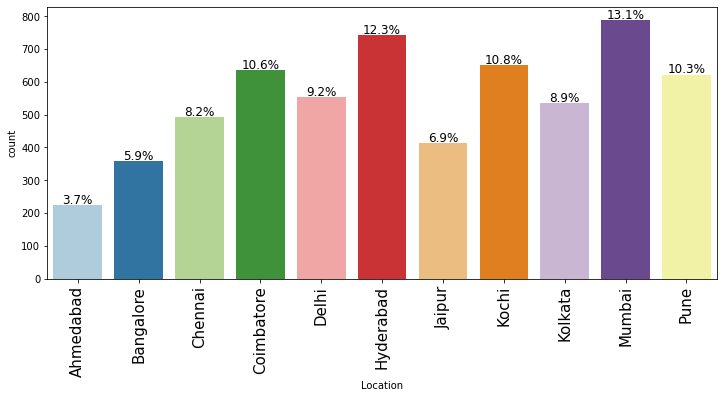

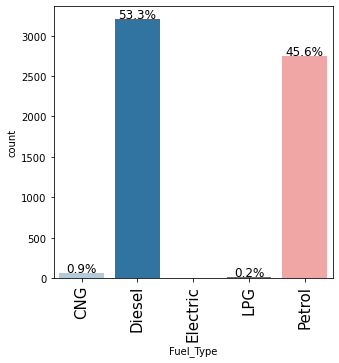

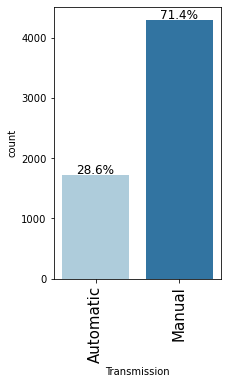

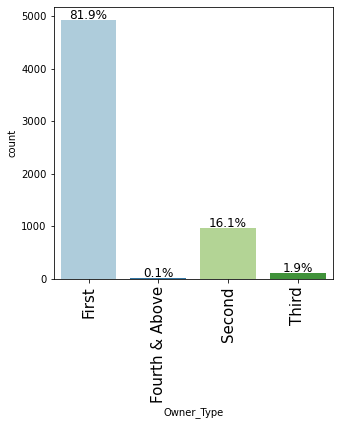

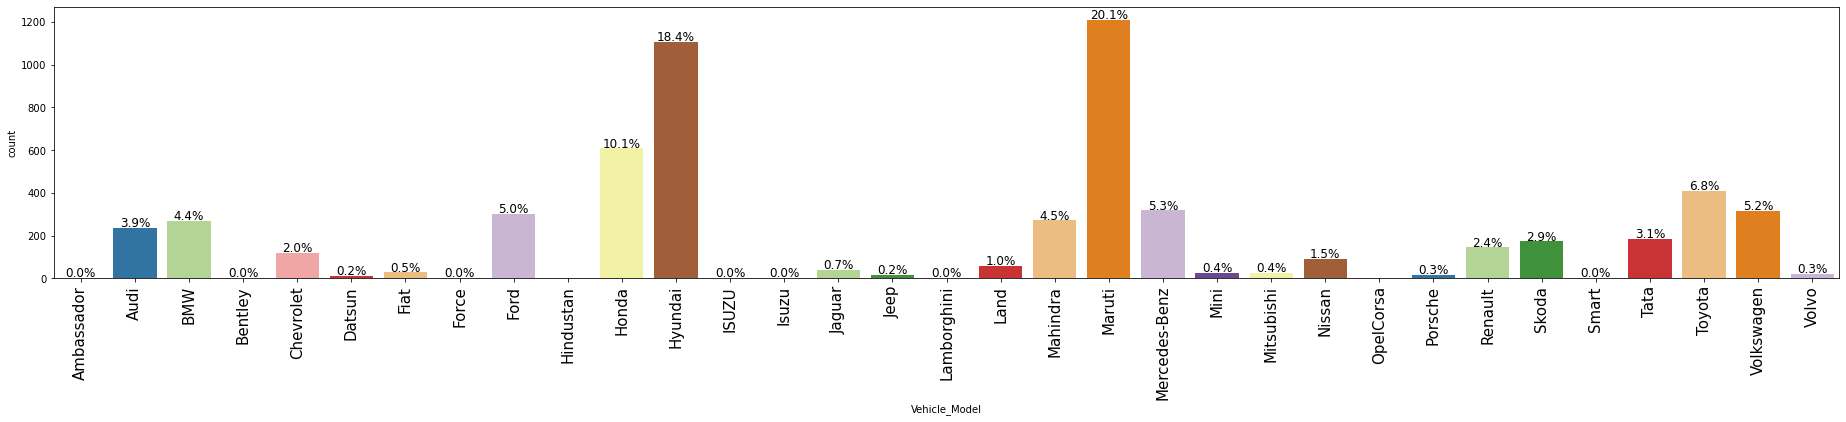

<IPython.core.display.Javascript object>

In [43]:
# Creating a function to display the values of the attributes against the chart

for i in category_columns:
    labeled_barplot(df, i, perc=True)


**Overall observations of the Categorical attributes**

* Mumbai location seems to be highest (13% ) selling vehicles, followed by Hyderabad location. Ahmedabad has the lowest sales
* Diesel type seems to be high selling followed by Petrol and then CNG. Electric cars are very less
* Most of the vehicles (approximately 70%) sold are of Manual transmission and 82% of them are First owner type
* Mostly the used cars are of First Hand types. The sales is less if the type of Fourth or above 
* Maruthi has been the most selling vehicle, followed by Hyundai& Honda brands
---

### Analyzing the Numerical attributes using Histogram and Box Plots

In [44]:
# Creating a common function to draw a Boxplot & a Histogram for each of the analysis
def histogram_boxplot(data, feature, figsize=(15, 7), kde=True, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram

    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

<IPython.core.display.Javascript object>

#### Aalyzing the Year of sales of the vehicles

In [45]:
df["Year"].value_counts()

2014    797
2015    744
2016    740
2013    649
2017    587
2012    580
2011    465
2010    342
2018    298
2009    198
2008    174
2007    125
2019    102
2006     78
2005     57
2004     31
2003     17
2002     15
2001      8
2000      4
1998      4
1999      2
Name: Year, dtype: int64

<IPython.core.display.Javascript object>

- *Major sales of the used cars was during 2014 and the dataset has a good range of sales information for the period between 2007 - 2019* 

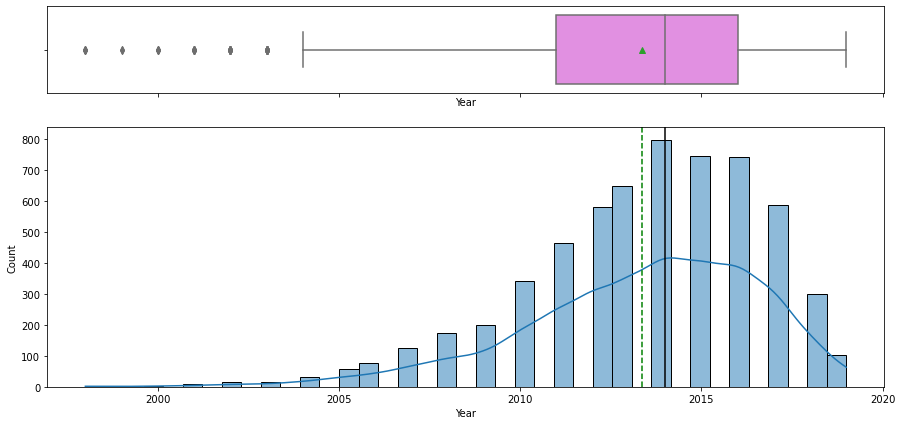

<IPython.core.display.Javascript object>

In [46]:
histogram_boxplot(df, "Year")

**Observations:**
* Distribution is negatively skewed with more number of cars sold around the **age range of 2005-2020** and some outliers towards the lower end
* The median is at **Year 2014** with the mean close to it **2013**. 
* Any information before 2005 seems to be considered as outliners and outside the range of the lower quadrant 


In [47]:
# Checking if the values before 2005 has any NA's
df[(df.Year < 2005) & df.Price.isna()]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model


<IPython.core.display.Javascript object>

* There are no rows with missing Price values for period before 2005. Considering the information before 2005 as an important information for used car price for the model we will include the outliers in the analysis. Price can de dependent on this attribute

---

#### Analyzing the Kilometers driven in the vehicle

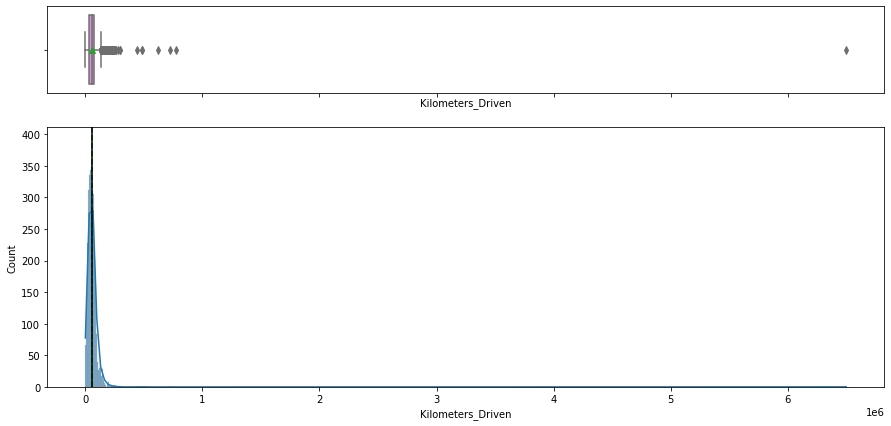

<IPython.core.display.Javascript object>

In [48]:
histogram_boxplot(df, "Kilometers_Driven")

**Observations:**
* Distribution is positvely skewed but there are chances for outliers which needs to be reviewed
  

**Checking for outliers in Kilometers driven**

In [49]:
# Distribution shows values more than 600000. Checking for values above 600000
df[(df.Kilometers_Driven >= 600000)].sort_values(
    by=["Year", "Kilometers_Driven"], ascending=[False, False]
)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
2328,Chennai,2017,6500000,Diesel,Automatic,First,15.97,2993.0,258.0,5.0,55.07,65.0,BMW
340,Kolkata,2013,775000,Diesel,Automatic,First,19.30,1968.0,141.0,5.0,25.83,7.5,Skoda
1860,Chennai,2013,720000,Diesel,Manual,First,20.54,1598.0,103.6,5.0,13.23,5.9,Volkswagen
358,Chennai,2009,620000,Petrol,Manual,First,20.36,1197.0,78.9,5.0,10.25,2.7,Hyundai


<IPython.core.display.Javascript object>

- *Assuming an average of 25000kms/year, we see that vechile "BMW X5 xDrive 30d M Sport" with manufacturing year of 2017  probably has a incorrect kilometers driven. We can drop this rows*

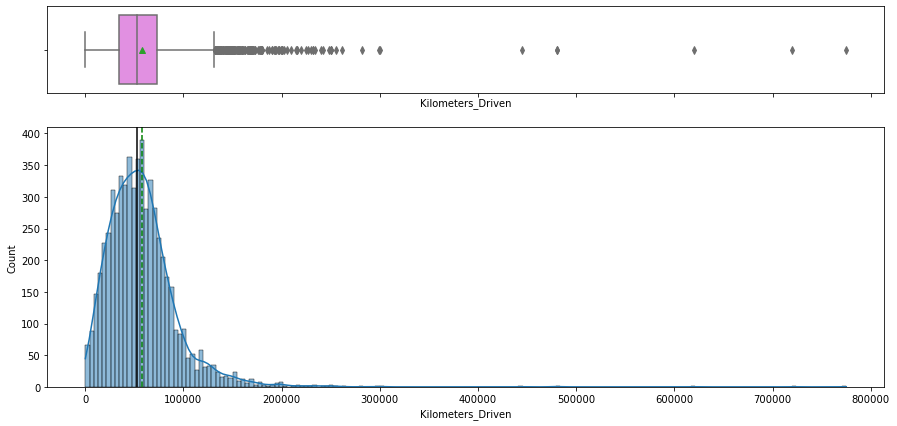

<IPython.core.display.Javascript object>

In [50]:
# Dropping the rows more than 6000000 and considering only the transactions less than 6000000
df = df.loc[df.Kilometers_Driven < 6000000]
histogram_boxplot(df, "Kilometers_Driven")

* We still see that the information is positvely skewed with lot of outliers. We can treat these data by using the max range of the quartile along with 4 times IQR

In [51]:
# Using the IQR to deduct the outlier with max range of quartile points - 0.1 & 0.9
quartiles = np.quantile(
    df["Kilometers_Driven"][df["Kilometers_Driven"].notnull()], [0.10, 0.90]
)
km_4iqr = 4 * (quartiles[1] - quartiles[0])
print(f"Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 4*IQR = {km_4iqr}")
outlier_powers = df.loc[
    np.abs(df["Kilometers_Driven"] - df["Kilometers_Driven"].median()) > km_4iqr,
    "Kilometers_Driven",
]
outlier_powers

Q1 = 20000.0, Q3 = 96924.0, 4*IQR = 307696.0


340     775000
358     620000
1860    720000
2823    480000
3092    480000
4490    445000
Name: Kilometers_Driven, dtype: int64

<IPython.core.display.Javascript object>

**Inferences:**

* Based on market standards, an average car maintained in good condition can last up to an avergae of 200000 miles or around 320000 kms in good condition. Users will not look for cars which have exceeded this kms and sales agent also will not prefer selling it. Considering the 4IQR exagerated value, we will drop the rows which are greater than 4IQR

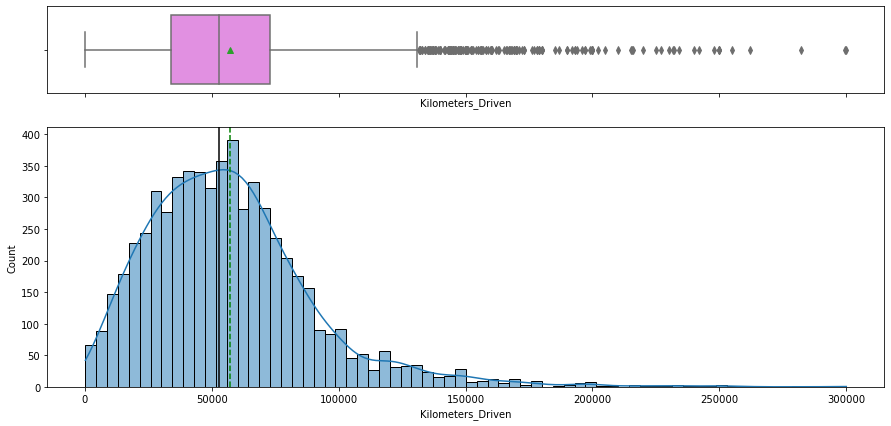

<IPython.core.display.Javascript object>

In [52]:
# Dropping the outliers that are more than the 4IQR
df.drop(
    df[
        np.abs(df["Kilometers_Driven"] - df["Kilometers_Driven"].median()) > km_4iqr
    ].index,
    inplace=True,
)
df.reset_index(drop=True, inplace=True)
histogram_boxplot(df, "Kilometers_Driven")

**Observations:**

- *The distribution looks better now and the skewness has been addressed*

#### Analyzing the Mileage of the vehicles

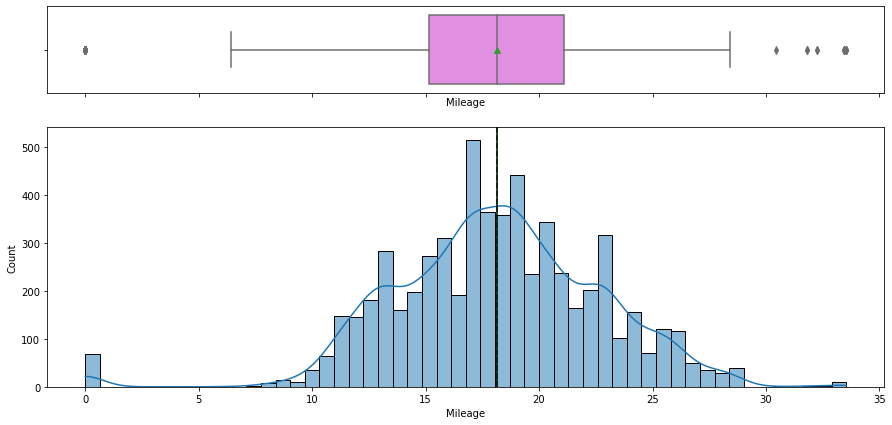

<IPython.core.display.Javascript object>

In [53]:
histogram_boxplot(df, "Mileage")

**Observations:**
* Mileage attribute seems to have a **normal** distribution with some outliers towards the higher end*
* The Mean & Median median are almost the same
* The new cars manufactured recently would probably have 0 to less mileage reported
---   

#### Analyzing the Engine of the vehicles

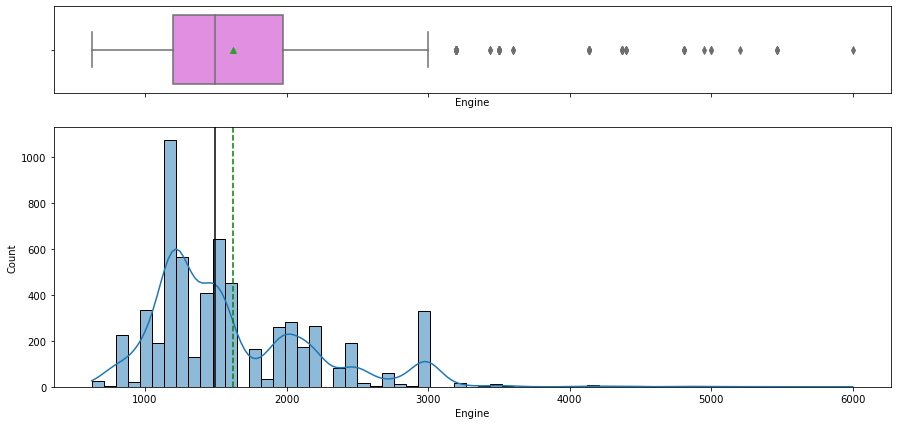

<IPython.core.display.Javascript object>

In [54]:
histogram_boxplot(df, "Engine")

**Inferences:**
* Distribution looks like almost normally distributed. Not much skewed
* There are few outliers at the higher end
* The Mean & Median median are almost close to each other

In [55]:
df[(df.Engine > 3000)].sort_values(by=["Engine"], ascending=[False]).head(20)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
5512,Hyderabad,2006,48000,Petrol,Automatic,First,8.60,5998.0,552.0,4.0,375.000,59.00,Bentley
4714,Kolkata,2010,35000,Petrol,Automatic,First,8.10,5461.0,387.3,2.0,49.490,29.50,Mercedes-Benz
4683,Bangalore,2014,3000,Petrol,Automatic,Second,12.00,5461.0,421.0,2.0,49.490,90.00,Mercedes-Benz
152,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.9,5.0,49.490,30.00,Mercedes-Benz
5772,Delhi,2011,6500,Petrol,Automatic,Third,6.40,5204.0,560.0,2.0,11.300,120.00,Lamborghini
5910,Hyderabad,2015,8000,Petrol,Automatic,First,12.50,5000.0,488.1,2.0,69.675,100.00,Jaguar
5079,Coimbatore,2011,43686,Petrol,Automatic,First,10.50,5000.0,503.0,4.0,69.675,50.66,Jaguar
4444,Kochi,2018,21290,Petrol,Automatic,First,13.00,4951.0,395.0,4.0,83.920,56.80,Ford
70,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.0,5.0,136.000,14.50,Porsche
2097,Mumbai,2010,35000,Petrol,Automatic,Second,11.90,4806.0,550.0,5.0,136.000,32.00,Porsche


<IPython.core.display.Javascript object>

**Observation:**

* Based on the market report analysis & manual validation, the Engine values of the high end cars are true to their actual specifications. Hence we dont need to treat these as outliers

In [56]:
df[(df.Engine < 1000)].sort_values(by=["Engine"], ascending=[True]).head(20)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
1711,Pune,2011,65000,Petrol,Manual,Second,26.0,624.0,35.00,4.0,7.63,0.44,Tata
4335,Coimbatore,2017,14149,Petrol,Manual,First,23.9,624.0,37.48,4.0,7.63,3.47,Tata
5465,Coimbatore,2015,30676,Petrol,Manual,First,25.4,624.0,37.50,4.0,7.63,2.90,Tata
5459,Kochi,2014,59508,Petrol,Manual,First,25.4,624.0,37.48,4.0,7.63,1.26,Tata
1320,Coimbatore,2016,5240,Petrol,Automatic,First,21.9,624.0,37.48,4.0,7.63,3.60,Tata
5378,Coimbatore,2015,25811,Petrol,Manual,Second,25.4,624.0,37.50,4.0,7.63,2.13,Tata
5368,Bangalore,2016,17800,Petrol,Automatic,Second,21.9,624.0,37.48,4.0,7.63,2.38,Tata
2319,Pune,2011,50000,Petrol,Manual,Second,23.9,624.0,37.48,4.0,7.63,0.75,Tata
1456,Pune,2013,4700,Petrol,Manual,First,25.4,624.0,37.48,4.0,7.63,1.20,Tata
521,Ahmedabad,2014,18000,Petrol,Manual,Second,25.4,624.0,37.50,4.0,7.63,1.00,Tata


<IPython.core.display.Javascript object>

**Observation:**

* Based on the market report analysis & manual validation, the Engine values of the low end cars are true to their actual specifications. Hence we dont need to treat these as outliers

#### Analyzing the Power of the vehicles

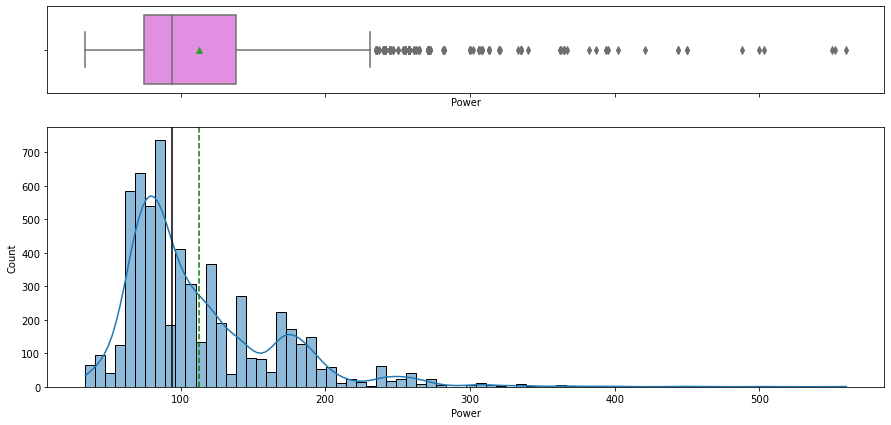

<IPython.core.display.Javascript object>

In [57]:
histogram_boxplot(df, "Power")

**Inferences:**
* Income attribute has a **positive skewed** distribution with more outliers towards the higher end
* Median is lesser than the Mean 

In [58]:
df[(df.Power > 300)].head().sort_values(by=["Power"], ascending=[False])

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
70,Mumbai,2008,73000,Petrol,Automatic,First,8.50,4806.0,500.00,5.0,136.00,14.5,Porsche
148,Mumbai,2013,23000,Petrol,Automatic,First,11.05,2894.0,444.00,4.0,128.00,37.0,Audi
152,Kolkata,2010,35277,Petrol,Automatic,First,7.81,5461.0,362.90,5.0,49.49,30.0,Mercedes-Benz
134,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,95.04,54.0,Mercedes-Benz
326,Mumbai,2011,30000,Diesel,Automatic,First,9.52,2993.0,313.00,4.0,55.07,49.0,BMW


<IPython.core.display.Javascript object>

**Observation:**

* Based on the market report analysis & manual validation, the Power values of the high end cars are true to their actual specifications. Hence we dont need to treat these as outliers

In [59]:
df[(df.Power < 100)].sort_values(by=["Power"], ascending=[True]).head(15)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
2193,Coimbatore,2017,15473,Petrol,Manual,First,16.8,796.0,34.2,5.0,7.88,3.58,Maruti
1909,Mumbai,2013,11734,Petrol,Manual,First,16.8,796.0,34.2,8.0,7.88,2.25,Maruti
3315,Jaipur,2012,126000,Petrol,Manual,First,16.8,796.0,34.2,5.0,7.88,1.60,Maruti
788,Hyderabad,2013,26875,Petrol,Manual,First,16.8,796.0,34.2,8.0,7.88,2.35,Maruti
3086,Jaipur,2015,15000,Petrol,Manual,First,16.8,796.0,34.2,8.0,7.88,2.35,Maruti
2844,Kolkata,2015,23000,Petrol,Manual,First,16.8,796.0,34.2,5.0,7.88,1.50,Maruti
1006,Kochi,2019,11571,Petrol,Manual,First,16.8,796.0,34.2,8.0,7.88,3.80,Maruti
1799,Kochi,2012,4187,Petrol,Manual,First,26.0,624.0,35.0,4.0,7.63,1.38,Tata
105,Coimbatore,2010,93850,Petrol,Manual,First,14.0,796.0,35.0,5.0,7.88,2.41,Maruti
4798,Jaipur,2004,66624,Petrol,Manual,Third,19.7,796.0,35.0,8.0,7.88,0.85,Maruti


<IPython.core.display.Javascript object>

**Observation:**

* Based on the market report analysis & manual validation, the Power values of the low end cars are true to their actual specifications. Hence we dont need to treat these as outliers

#### Analyzing the Number of Seats in the vehicles

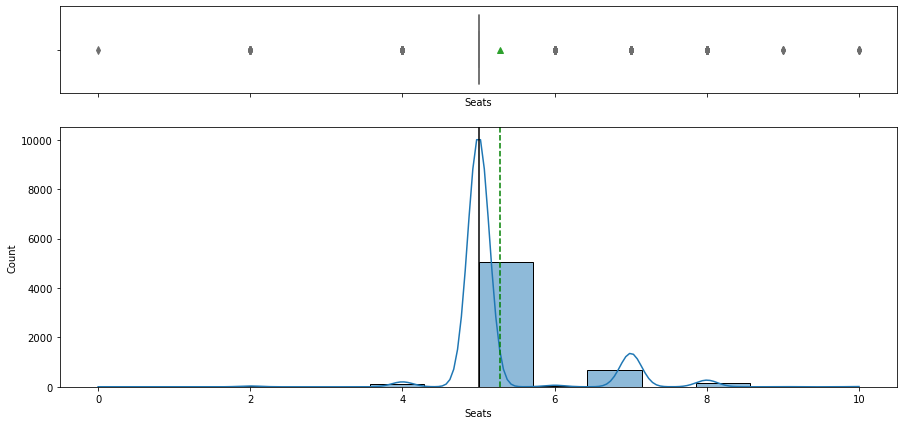

<IPython.core.display.Javascript object>

In [60]:
histogram_boxplot(df, "Seats")

In [61]:
df[(df.Seats > 4)].head(10).sort_values(by=["Seats"], ascending=[False])

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
7,Mumbai,2016,36000,Diesel,Automatic,First,11.36,2755.0,171.50,8.0,21.00,17.50,Toyota
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814.0,55.20,5.0,10.25,2.35,Hyundai
6,Jaipur,2013,86999,Diesel,Manual,First,23.08,1461.0,63.10,5.0,9.47,3.50,Nissan
8,Pune,2013,64430,Diesel,Manual,First,20.54,1598.0,103.60,5.0,13.23,5.20,Volkswagen
9,Chennai,2012,65932,Diesel,Manual,Second,22.30,1248.0,74.00,5.0,7.63,1.95,Tata


<IPython.core.display.Javascript object>

**Observations:**
- *The distribution seems to be normally distributed and the data points looks correct based on ramdom sampling with market information. We dont have to treat the outliers* 

#### Analyzing the New Prices

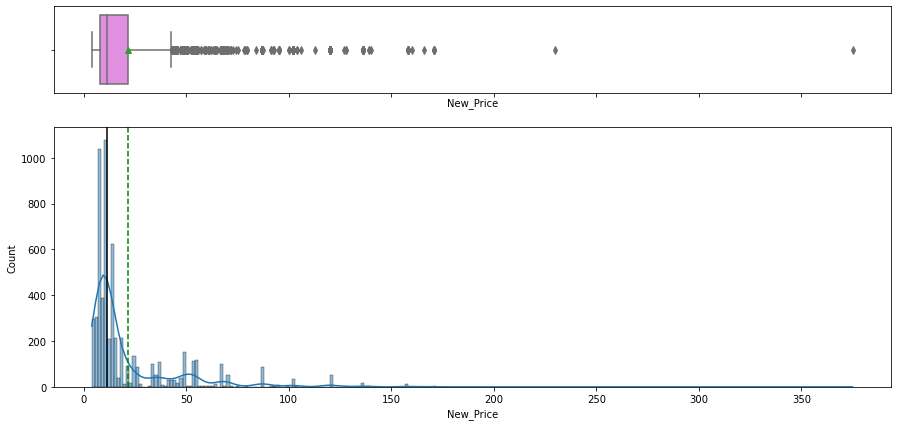

<IPython.core.display.Javascript object>

In [62]:
histogram_boxplot(df, "New_Price")

**Inferences:**

* The New vehicle prices seems to have high positive skew
* Some of the vehicles seems to have very high price


In [63]:
# Checking vehicles with very high price > 100 lakhs
df_newprice = df[(df.New_Price > 100)].sort_values(
    by=["New_Price", "Vehicle_Model"], ascending=[False, True]
)
df_newprice.sort_values(by=["Price"], ascending=False, inplace=False)
df_newprice.head(10)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
5512,Hyderabad,2006,48000,Petrol,Automatic,First,8.60,5998.0,552.00,4.0,375.0,59.00,Bentley
4073,Hyderabad,2017,25000,Diesel,Automatic,First,13.33,2993.0,255.00,5.0,230.0,160.00,Land
3933,Mumbai,2006,30000,Petrol,Manual,First,13.00,2987.0,210.00,5.0,171.0,10.75,Mercedes-Benz
4137,Chennai,2003,111000,Petrol,Automatic,First,13.00,2987.0,210.00,5.0,171.0,6.50,Mercedes-Benz
4239,Coimbatore,2007,84143,Petrol,Manual,First,13.00,2987.0,210.00,5.0,171.0,17.09,Mercedes-Benz
4666,Kochi,2004,119859,Petrol,Automatic,First,13.00,2987.0,210.00,5.0,171.0,7.10,Mercedes-Benz
4770,Bangalore,2011,47140,Diesel,Automatic,Second,13.50,2925.0,281.61,5.0,171.0,30.00,Mercedes-Benz
3193,Kolkata,2012,41100,Diesel,Automatic,First,16.77,2993.0,261.49,5.0,166.0,26.50,BMW
3746,Kochi,2015,38467,Diesel,Automatic,First,12.65,2993.0,255.00,5.0,160.0,70.66,Land
1121,Pune,2008,66000,Petrol,Automatic,Second,8.45,2979.0,321.00,5.0,158.0,10.75,BMW


<IPython.core.display.Javascript object>

In [64]:
# Validating the high end vechiles prices from the list
df[
    (df["Vehicle_Model"] == "Bentley")
    | (df["Vehicle_Model"] == "Mercedes-Benz")
    | (df["Vehicle_Model"] == "Land")
].head(15)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
13,Delhi,2014,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,120.000,27.00,Land
14,Pune,2012,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,120.000,17.50,Land
19,Bangalore,2014,78500,Diesel,Automatic,First,14.84,2143.0,167.62,5.0,49.490,28.00,Mercedes-Benz
38,Pune,2013,85000,Diesel,Automatic,First,11.74,2987.0,254.80,5.0,49.490,28.00,Mercedes-Benz
62,Delhi,2015,58000,Petrol,Automatic,First,11.74,1796.0,186.00,5.0,49.490,26.70,Mercedes-Benz
63,Pune,2011,65000,Diesel,Manual,Second,15.80,2148.0,170.00,5.0,49.490,10.00,Mercedes-Benz
67,Coimbatore,2019,15369,Diesel,Automatic,First,0.00,1950.0,194.00,5.0,49.140,35.67,Mercedes-Benz
121,Pune,2014,53753,Diesel,Automatic,Second,15.00,2143.0,107.30,5.0,37.030,16.75,Mercedes-Benz
126,Kolkata,2009,28352,Petrol,Automatic,First,11.70,1796.0,178.00,5.0,49.490,9.35,Mercedes-Benz
134,Kolkata,2017,13372,Petrol,Automatic,First,19.00,2996.0,362.07,2.0,95.040,54.00,Mercedes-Benz


<IPython.core.display.Javascript object>

**Observations:**
* The New Price values are aligned with the market values and they are not outliers

---

## Visualise Numerical variables association with each other & its Correlation
---

### Bivariate Analysis

<AxesSubplot:>

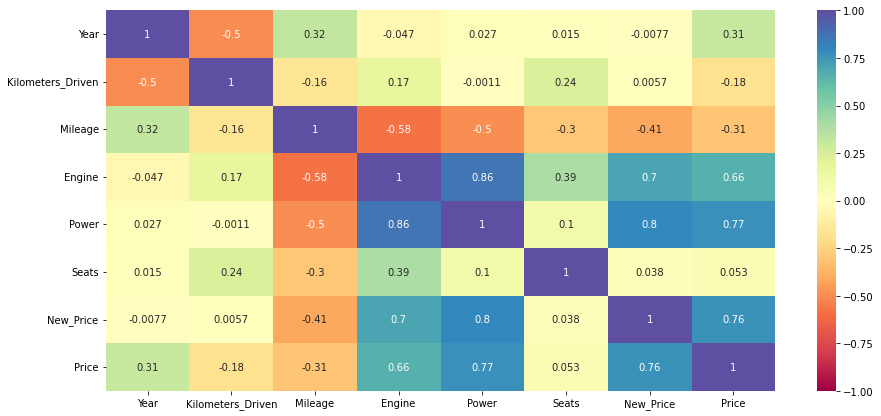

<IPython.core.display.Javascript object>

In [65]:
# Plotting Heatmap by creating a 2-D Matrix with correlation plots
correlation = df.corr()
plt.figure(figsize=(15, 7))
sns.heatmap(correlation, vmin=-1, vmax=1, annot=True, cmap="Spectral")

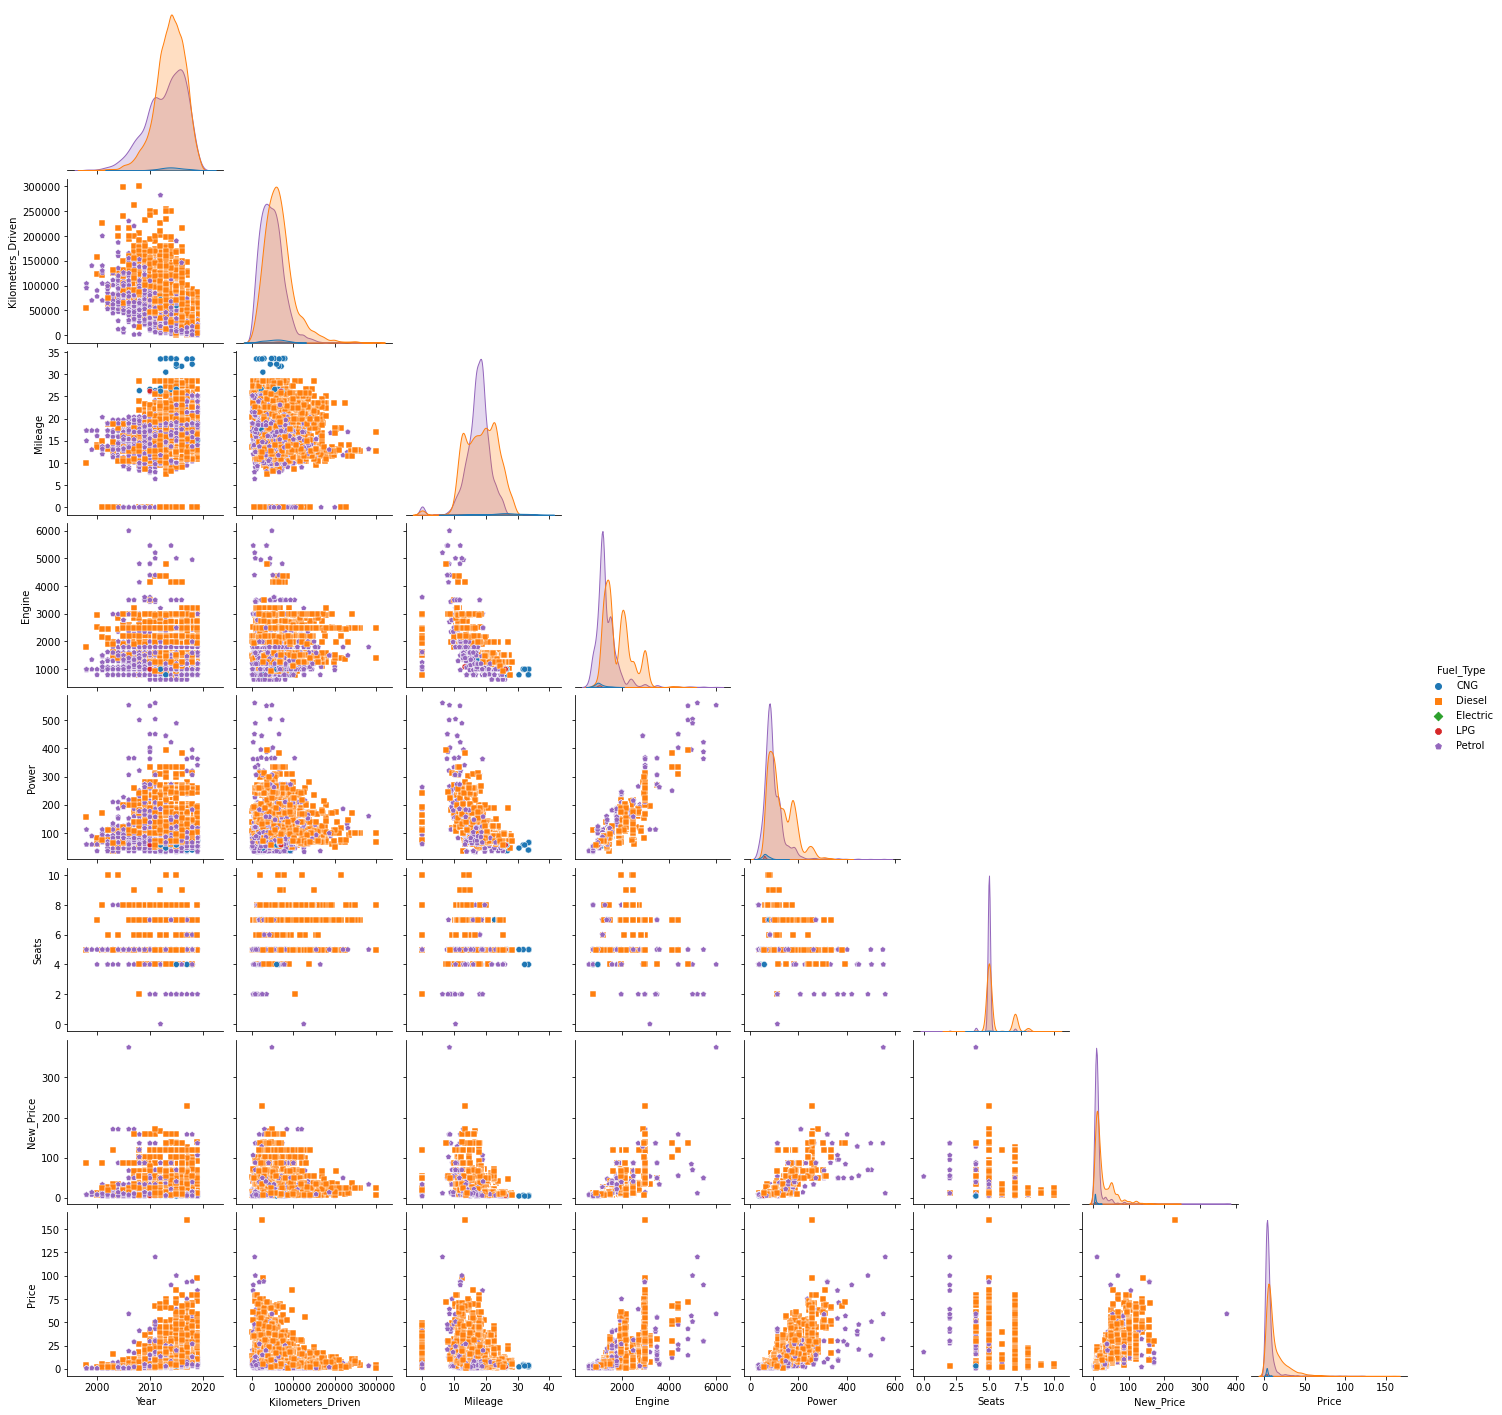

<IPython.core.display.Javascript object>

In [66]:
sns.pairplot(
    df, diag_kind="kde", corner=True, hue="Fuel_Type", markers=["o", "s", "D", "8", "p"]
)

**Observations:**

**Considering Price as reference**
* Year has very less correlation 
* Kilometers driven and Mileage have a negative correlation with Price. As they increase the price value decreases
* Power has very high correlation and drives the used car price. Given that Power & Engine have a very high correlation, the Engine also has a correlation with Price
* Seats has very low correlation. The number os seats does not seem to play a major role 
* Price of New Cars have a direct correlation with Used Car Price. When new car price is low, used car price is low and vice versa

**Other Observations:**
* Engine & Power are highly correlated and it drives the New_Price of cars
* Kilometers driven are negatively correlated with Years 
* Engine & Power are negative correlated with Mileage which proves the fact that when the engine power is more then the mileage reduces


### Analyzing the various attributes with Price

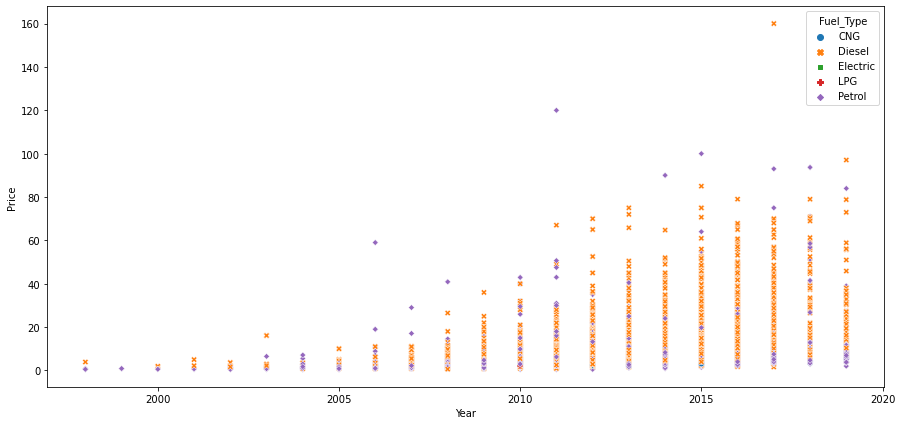

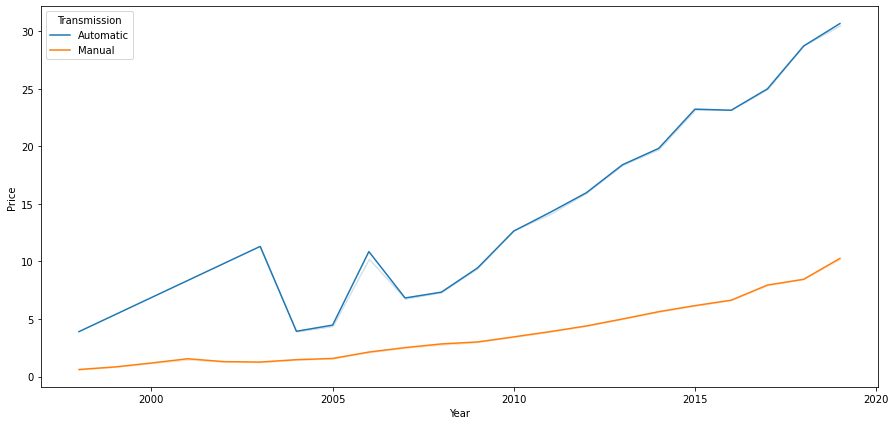

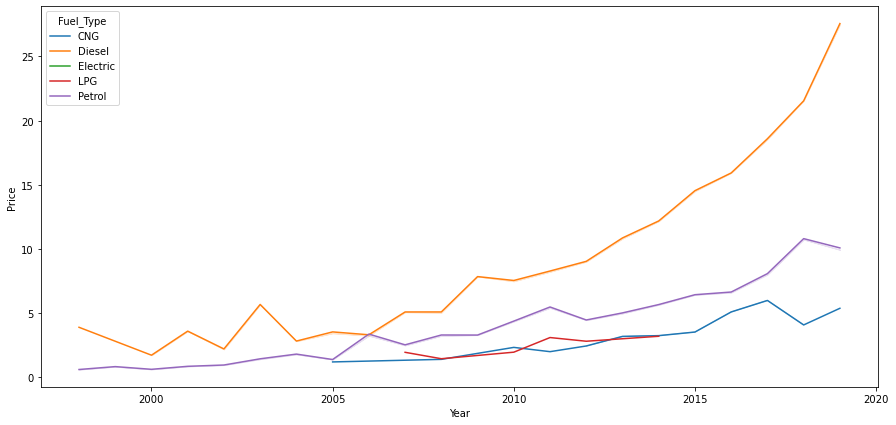

<IPython.core.display.Javascript object>

In [67]:
# Compairing with the Year of Manufacture
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x="Year", y="Price", hue="Fuel_Type", style="Fuel_Type")
plt.show()
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x="Year", y="Price", ci=False, hue="Transmission")
plt.show()
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x="Year", y="Price", ci=False, hue="Fuel_Type")
plt.show()

**Observation:**

- *Year of manufacture has less correlation and its distributed. We could see that if the vehicle is very old, then the price is less*
- *Automatic cars price has been increasing over the period of years
- *Automatic cars has higher prices than the manual cars*
- *Automatic transmission has a higher correlation with year of manufacture*
- *New Cars with Diesel type has high price than petrol cars*


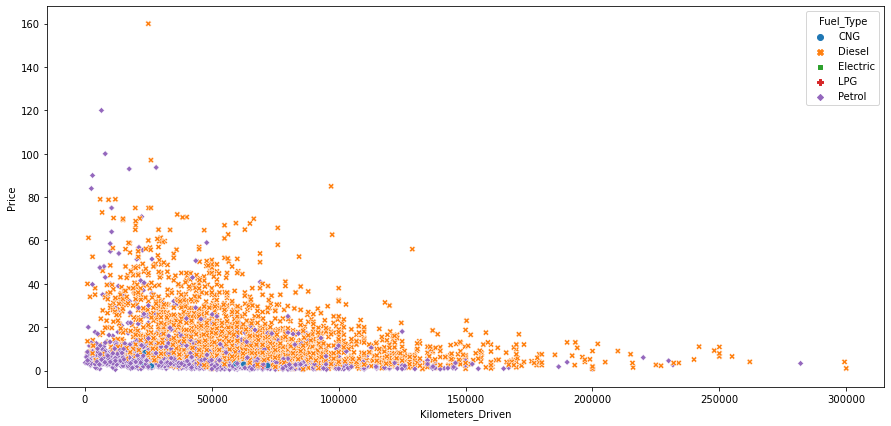

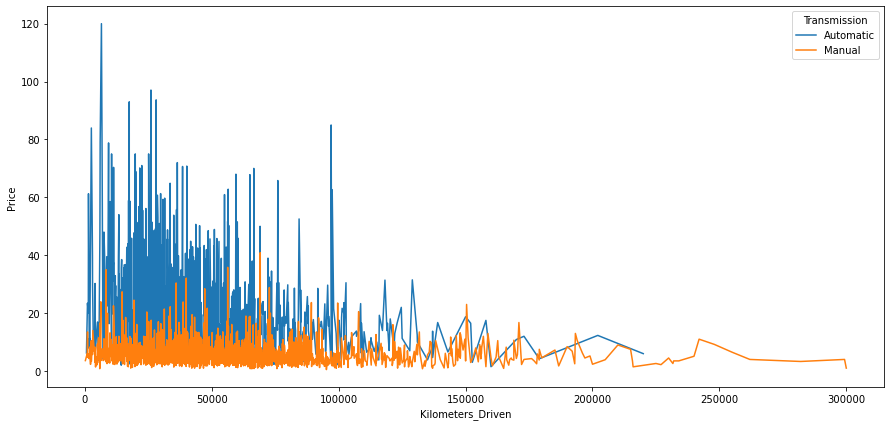

<IPython.core.display.Javascript object>

In [68]:
# Compairing with the Kilometers Driven
plt.figure(figsize=(15, 7))
sns.scatterplot(
    data=df, x="Kilometers_Driven", y="Price", hue="Fuel_Type", style="Fuel_Type"
)
plt.show()
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x="Kilometers_Driven", y="Price", ci=False, hue="Transmission")
plt.show()

**Observation:**

- *Price is reduced with more number of Kilometers driven*
- *Automatic cars had higher prices and dimnishing as more kms driven when copared with manual cars*
- *Diesel vehicles & Manual transmissions have higher kilometers driving capacity*

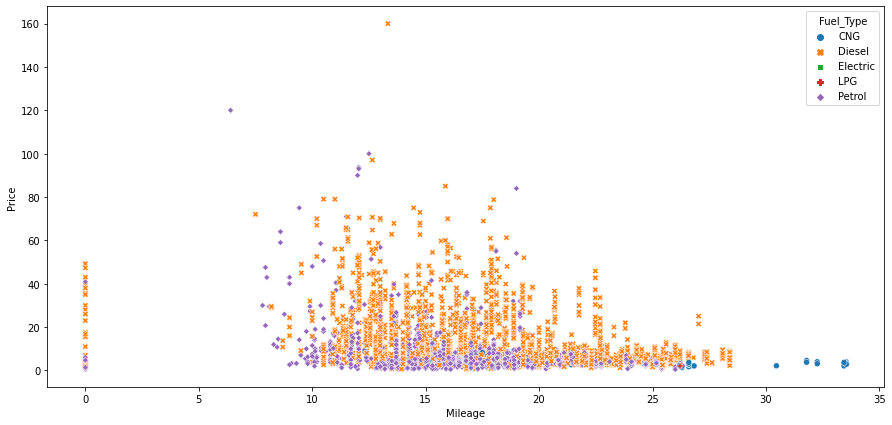

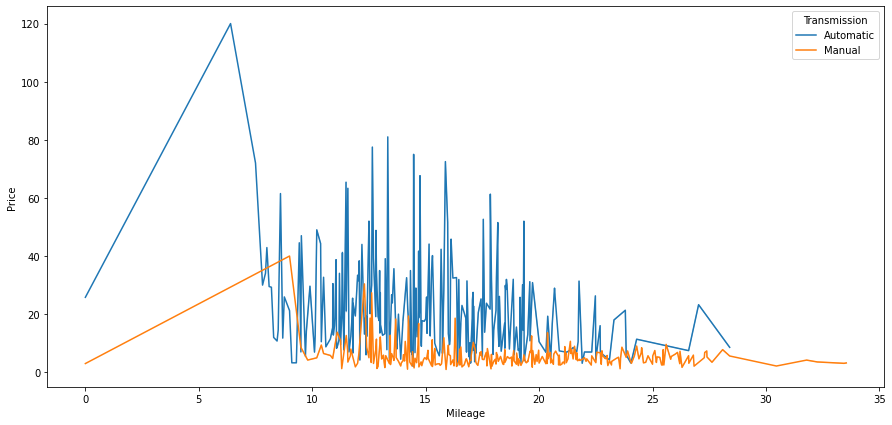

<IPython.core.display.Javascript object>

In [69]:
# Compairing with the Mileage Driven
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x="Mileage", y="Price", hue="Fuel_Type", style="Fuel_Type")
plt.show()
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x="Mileage", y="Price", ci=False, hue="Transmission")
plt.show()

**Observation:**

- *Mileage is negatively correlated with Price which is strange. Usually when the vechile mileage is more, the price is expetced to me more, but the data is showing otherwise*

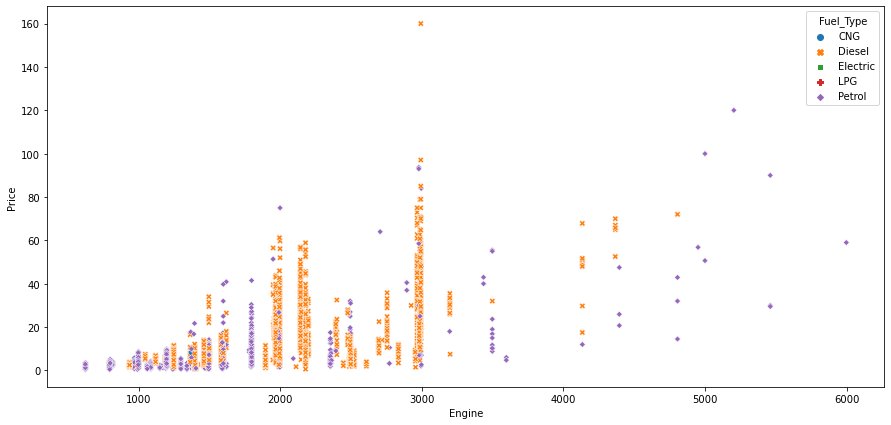

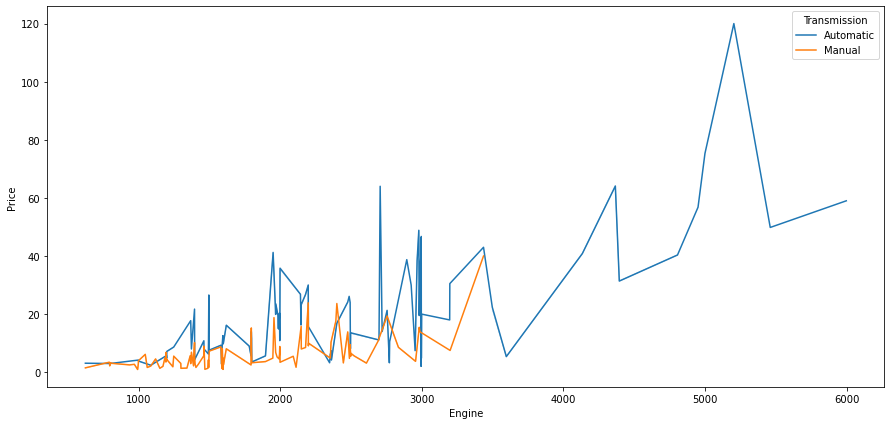

<IPython.core.display.Javascript object>

In [70]:
# Compairing with the Engine Driven
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x="Engine", y="Price", hue="Fuel_Type", style="Fuel_Type")
plt.show()
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x="Engine", y="Price", ci=False, hue="Transmission")
plt.show()

**Observation:**

- *Engine & Price are high correlated. With increase in Engine, Price also increases*
- *Automatic cars seems to have a higher prices with increase in Engine capacity*
- *Since Engine & Power are highly correlated, we expect the same for Power as well when compared to Price*

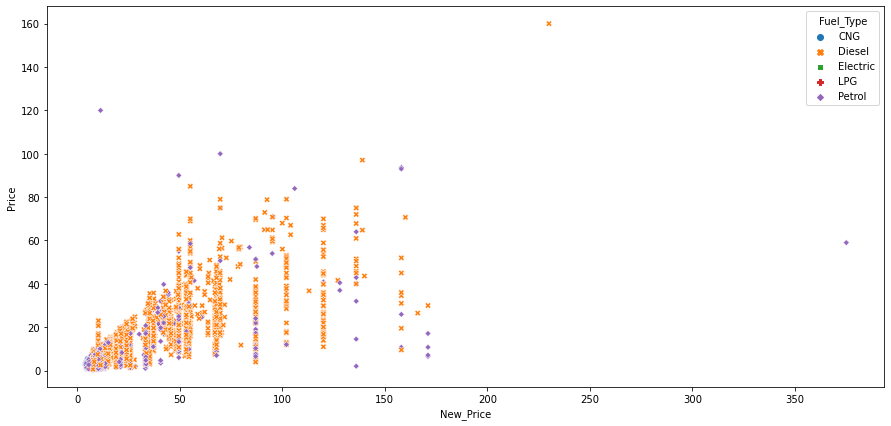

<IPython.core.display.Javascript object>

In [71]:
# Compairing with the New Price
plt.figure(figsize=(15, 7))
sns.scatterplot(data=df, x="New_Price", y="Price", hue="Fuel_Type", style="Fuel_Type")
plt.show()

**Observation:**

- *New Price has a direct correlation with Price*
---

## Visualise Categorical variables association with Price
---

#### Compairing Price with Location

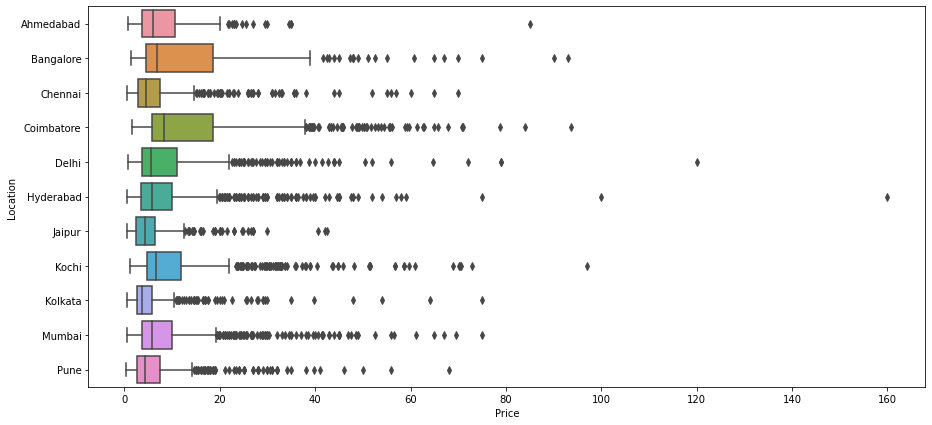

<IPython.core.display.Javascript object>

In [72]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Price", y="Location", data=df)
plt.show()

**Observation:**

- *Though Mumbai, Hyderabad & Pune where the largest sellers of vehicles, we see Coimbatore, Bangalore have vehicles sold at higer prices and vehicles with wider price distributions*

#### Compairing Price with Fuel Type along with Transmission

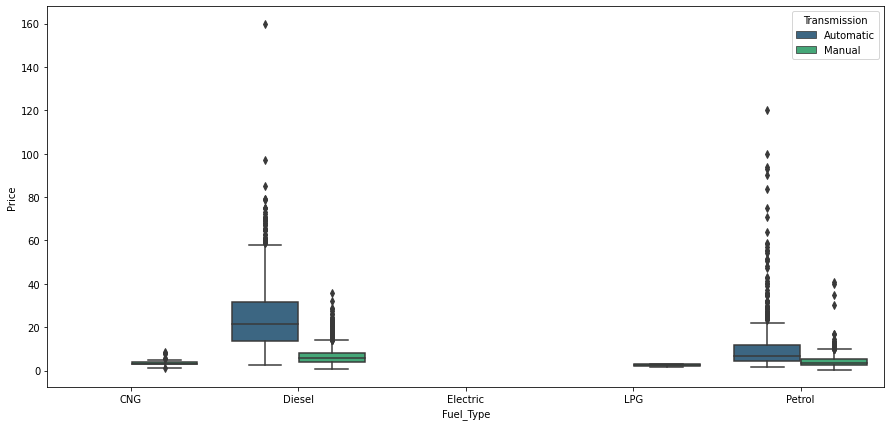

<IPython.core.display.Javascript object>

In [73]:
plt.figure(figsize=(15, 7))
sns.boxplot(
    x="Fuel_Type", y="Price", data=df, hue=df["Transmission"], palette="viridis"
)
plt.show()

**Observation:**

- *Diesel has higher price range and distribution of vehicles, following by Petrol & LPG*
- *Automatic transmissions have a higher price range than manual cars*

#### Compairing Price with Owner Type

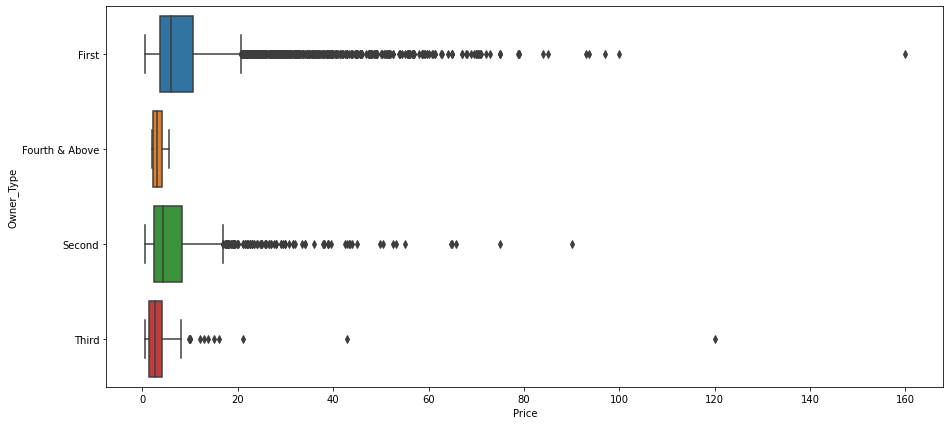

<IPython.core.display.Javascript object>

In [74]:
plt.figure(figsize=(15, 7))
sns.boxplot(x="Price", y="Owner_Type", data=df)
plt.show()

**Observation:**

- *Vehicles with First Owner type has higher price than the second, thir & fourth owners*
- *The price of the vehicles is very less when its a Fourth owner or above type*

#### Compairing Kilometers Driven with Year along with Fuel Type as HUE

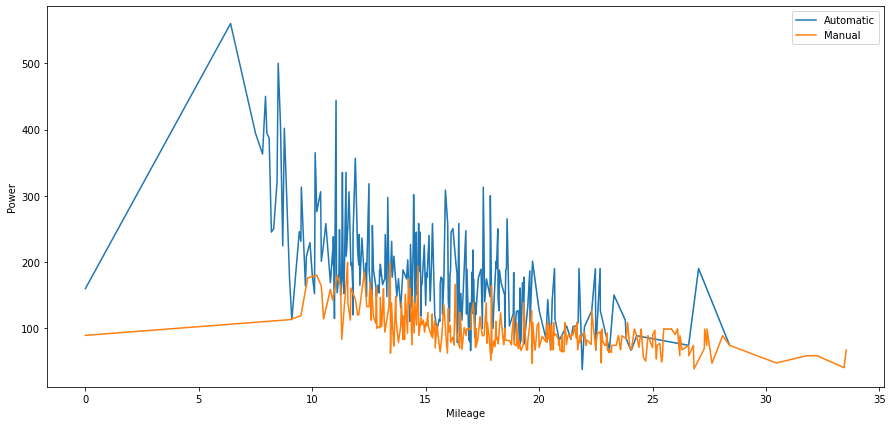

<IPython.core.display.Javascript object>

In [75]:
plt.figure(figsize=(15, 7))
sns.lineplot(data=df, x="Mileage", y="Power", hue="Transmission", ci=0)
plt.legend(bbox_to_anchor=(1.00, 1))
plt.show()

* High Power Vechiles have less Mileage 

#### Compairing Location with Fuel Type

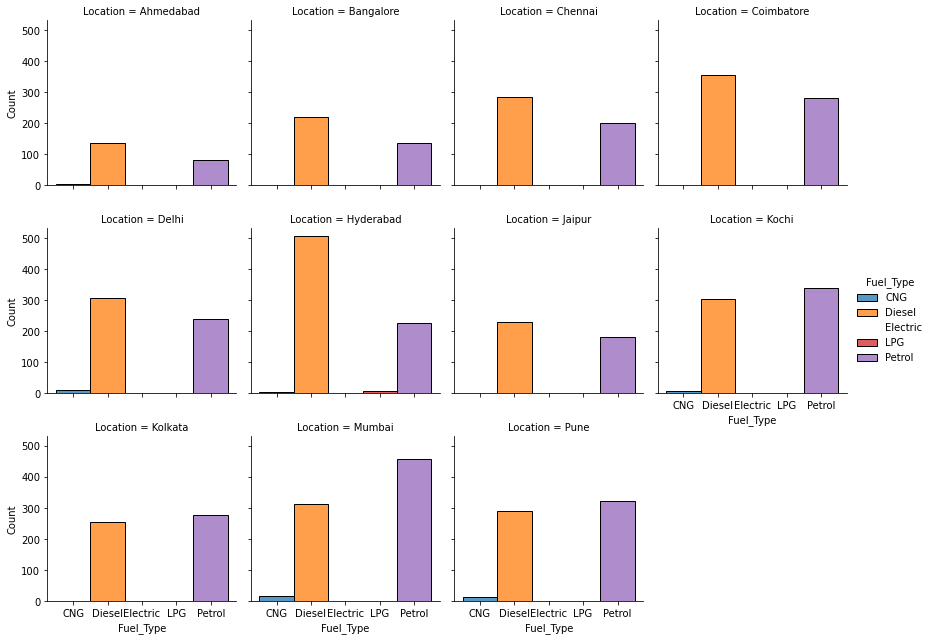

<IPython.core.display.Javascript object>

In [76]:
g = sns.FacetGrid(df, col="Location", hue="Fuel_Type", col_wrap=4, margin_titles=True)
g.map(sns.histplot, "Fuel_Type")
g.add_legend()

* Hyderabad seems to have the highest Diesel vehicle sales
* Mumbai seems to have the highes Petrol vehicle sales
* Ahmedabad seems to have the lowest vehicle sales
* Mumbai, Pune & Delhi seems to have sales on CNG fuel type of vechiles

#### Compairing Price and Year of Manufacture across the various locations

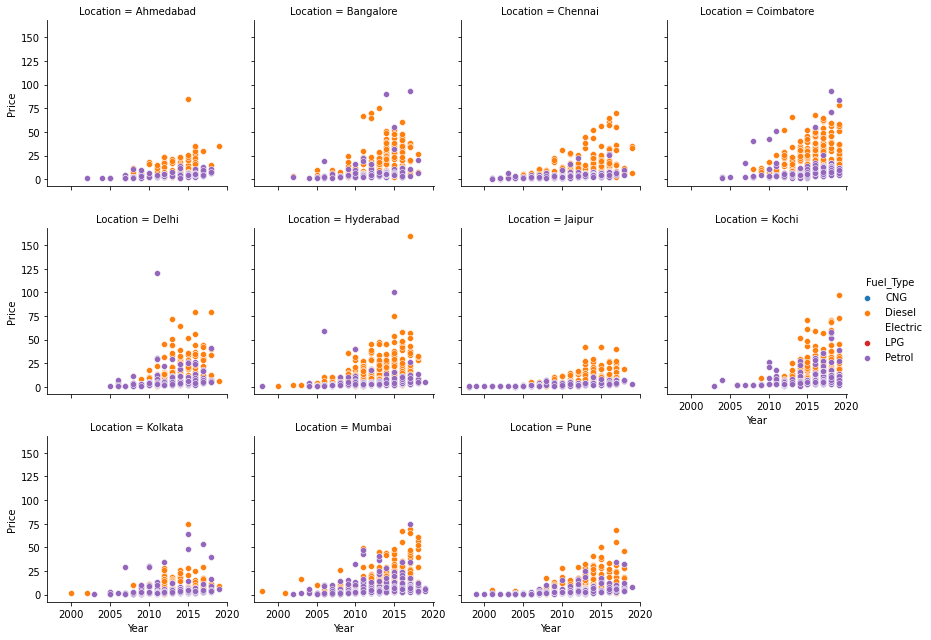

<IPython.core.display.Javascript object>

In [77]:
g = sns.FacetGrid(df, col="Location", hue="Fuel_Type", col_wrap=4, margin_titles=True)
g.map(sns.scatterplot, "Year", "Price")
g.add_legend()

**Observations:**
* Hyderabad has a lot of Diesel vehicle sales while Mumbai seems to have a lot of Petrol vehicle sales
* Diesel cars seems to be expensive than the Petrol cars

#### Comparison of Vehicle Models across locations, against Price and number of Seats

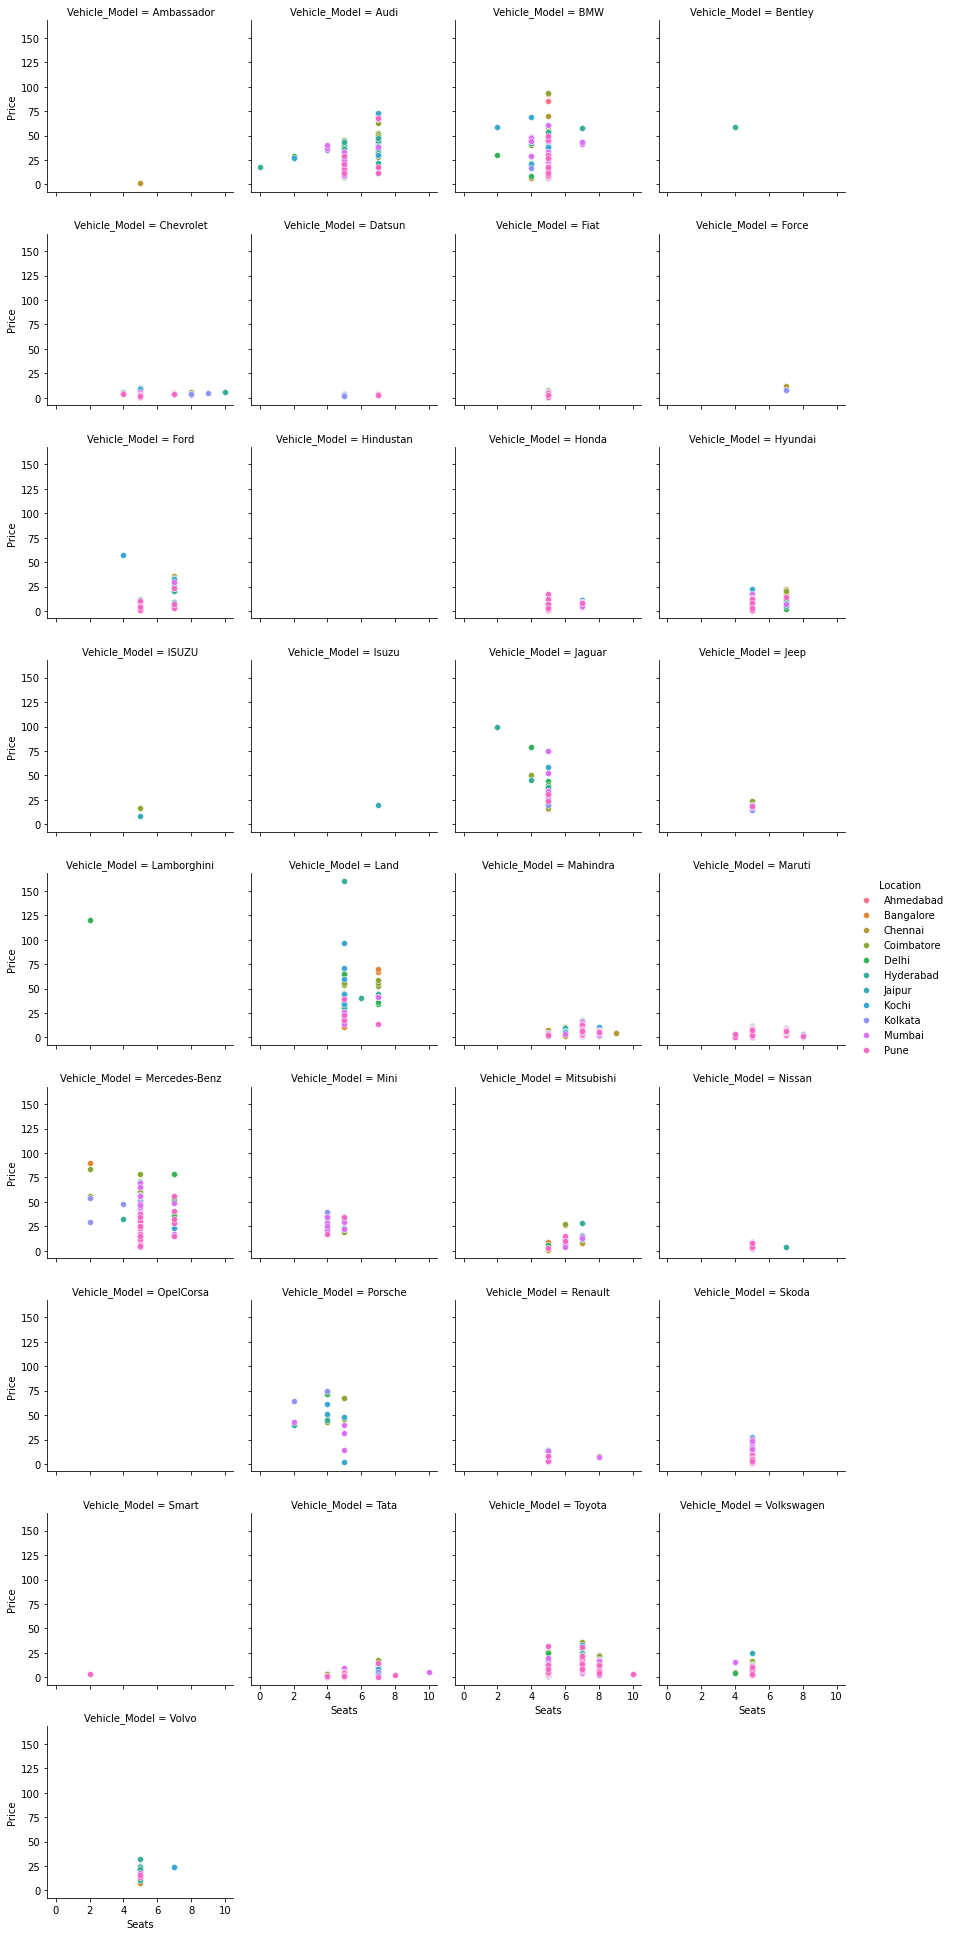

<IPython.core.display.Javascript object>

In [78]:
g = sns.FacetGrid(
    df, col="Vehicle_Model", hue="Location", col_wrap=4, margin_titles=True
)
g.map(sns.scatterplot, "Seats", "Price")
g.add_legend()

**Observations:**
* Pune & Mumbai has had a high sales of Benz vehicles

---

## Variable Transformations
---

In [79]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6010,11,Mumbai,789,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6010.0,NaN,NaN,NaN,2013.357903,3.270904,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6010.0,NaN,NaN,NaN,57143.479368,33775.774691,171.0,34000.0,53000.0,73000.0,300000.0
Fuel_Type,6010,4,Diesel,3201,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6010,2,Manual,4295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6010,4,First,4920,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6010.0,NaN,NaN,NaN,18.134614,4.584616,0.0,15.155,18.15,21.1,33.54
Engine,6010.0,NaN,NaN,NaN,1619.21613,600.3982,624.0,1197.0,1493.0,1975.75,5998.0
Power,6010.0,NaN,NaN,NaN,112.723827,53.475191,34.2,74.9,94.0,138.095,560.0
Seats,6010.0,NaN,NaN,NaN,5.277205,0.806879,0.0,5.0,5.0,5.0,10.0


<IPython.core.display.Javascript object>

### Checking the numeric columns for skewness

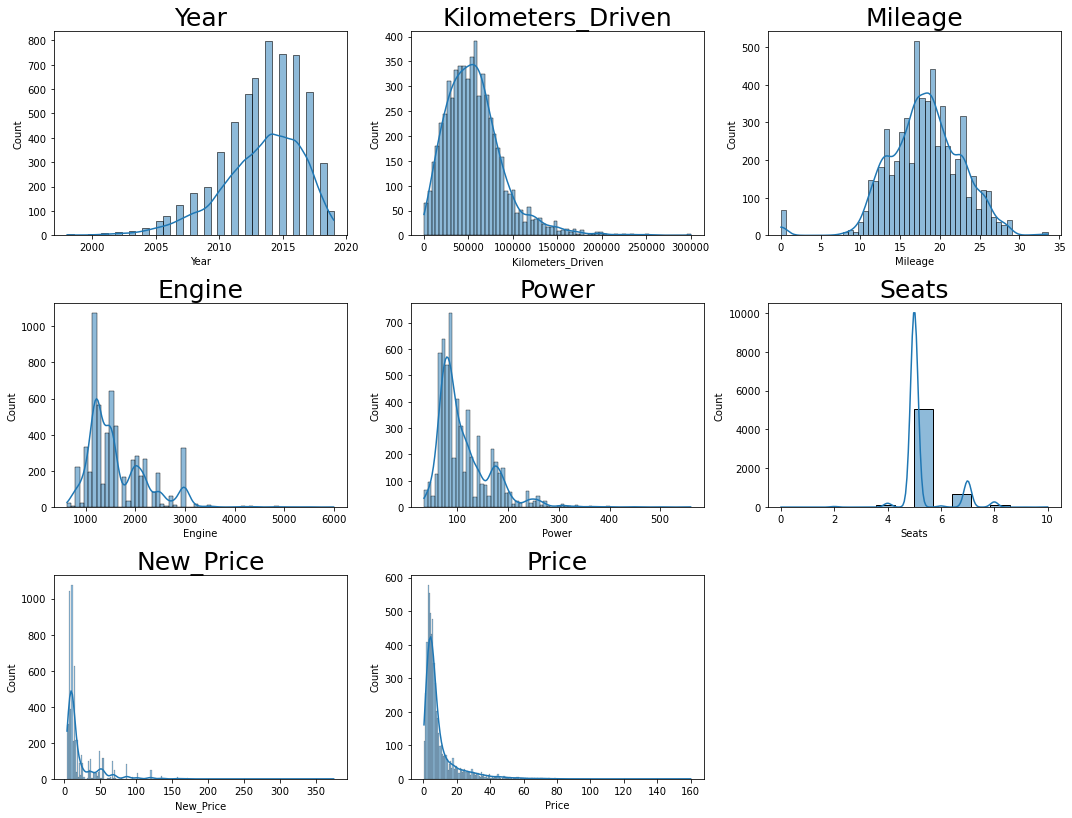

<IPython.core.display.Javascript object>

In [80]:
# creating a list of number columns
dist_cols = [item for item in df.select_dtypes(include=np.number).columns]

# let's plot a histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    # plt.hist(df[dist_cols[i]], bins=50)
    sns.histplot(
        data=df, x=dist_cols[i], kde=True
    )  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

**Observation:** 

* We see that the columns Engine, Power & New Price have a very skewed distribution.

In [81]:
dist_cols

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

<IPython.core.display.Javascript object>

In [82]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Vehicle_Model
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,5.51,1.75,Maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50,Hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50,Honda
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00,Maruti
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,53.14,17.74,Audi


<IPython.core.display.Javascript object>

In [83]:
# using log transforms on some columns

# creating a copy of the dataframe with Price log Transformation
df_trans_Price_log = df.copy()

for col in dist_cols:
    df_trans_Price_log[col + "_log"] = np.log(df_trans_Price_log[col] + 1)

# dropping the original columns
df_trans_Price_log.drop(dist_cols, axis=1, inplace=True)

# creating a copy of the dataframe for Price
df_trans_Price = df.copy()
dist_cols.remove("Price")

for col in dist_cols:
    df_trans_Price[col + "_log"] = np.log(df_trans_Price[col] + 1)

# dropping the original columns
df_trans_Price.drop(dist_cols, axis=1, inplace=True)



<IPython.core.display.Javascript object>

In [84]:
df_trans_Price_log.head()

,Location,Fuel_Type,Transmission,Owner_Type,Vehicle_Model,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,Seats_log,New_Price_log,Price_log
0,Mumbai,CNG,Manual,First,Maruti,7.606387,11.184435,3.317816,6.906755,4.080246,1.791759,1.873339,1.011601
1,Pune,Diesel,Manual,First,Hyundai,7.608871,10.621352,3.028683,7.367077,4.845761,1.791759,2.836737,2.602690
2,Chennai,Petrol,Manual,First,Honda,7.606885,10.736418,2.954910,7.090077,4.496471,1.791759,2.262804,1.704748
3,Chennai,Diesel,Manual,First,Maruti,7.607381,11.373675,3.080533,7.130099,4.497139,2.079442,2.507157,1.945910
4,Coimbatore,Diesel,Automatic,Second,Audi,7.607878,10.613271,2.785011,7.585281,4.954418,1.791759,3.991573,2.930660


<IPython.core.display.Javascript object>

In [85]:
df_trans_Price.head()

,Location,Fuel_Type,Transmission,Owner_Type,Price,Vehicle_Model,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,Seats_log,New_Price_log
0,Mumbai,CNG,Manual,First,1.75,Maruti,7.606387,11.184435,3.317816,6.906755,4.080246,1.791759,1.873339
1,Pune,Diesel,Manual,First,12.50,Hyundai,7.608871,10.621352,3.028683,7.367077,4.845761,1.791759,2.836737
2,Chennai,Petrol,Manual,First,4.50,Honda,7.606885,10.736418,2.954910,7.090077,4.496471,1.791759,2.262804
3,Chennai,Diesel,Manual,First,6.00,Maruti,7.607381,11.373675,3.080533,7.130099,4.497139,2.079442,2.507157
4,Coimbatore,Diesel,Automatic,Second,17.74,Audi,7.607878,10.613271,2.785011,7.585281,4.954418,1.791759,3.991573


<IPython.core.display.Javascript object>

---

### Skewness after applying the log transformation

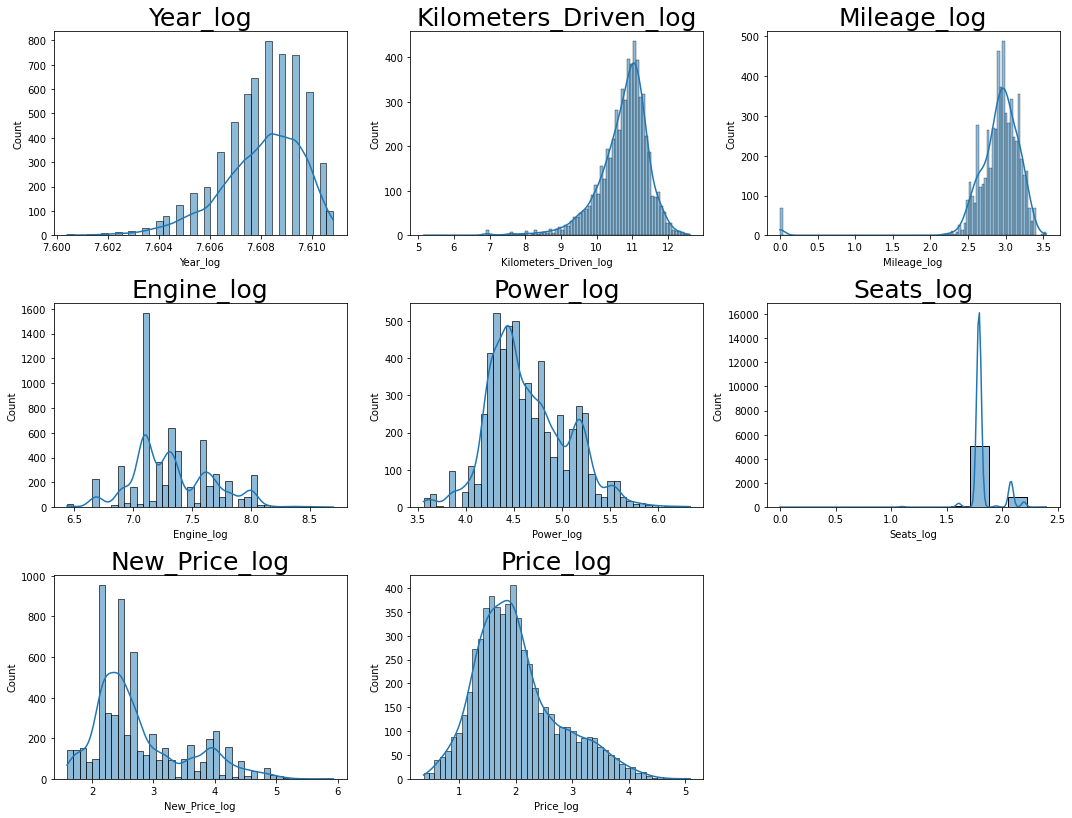

<IPython.core.display.Javascript object>

In [86]:
# creating a list of numbercolumns
dist_cols = [
    item for item in df_trans_Price_log.select_dtypes(include=np.number).columns
]

# let's plot histogram of all non-tag columns

plt.figure(figsize=(15, 45))

for i in range(len(dist_cols)):
    plt.subplot(12, 3, i + 1)
    # plt.hist(df3[dist_cols[i]], bins=50)
    sns.histplot(
        data=df_trans_Price_log, x=dist_cols[i], kde=True
    )  # you can comment the previous line and run this one to get distribution curves
    plt.tight_layout()
    plt.title(dist_cols[i], fontsize=25)

plt.show()

* The columns have a better distribution now

#### Let's check for correlations between the columns

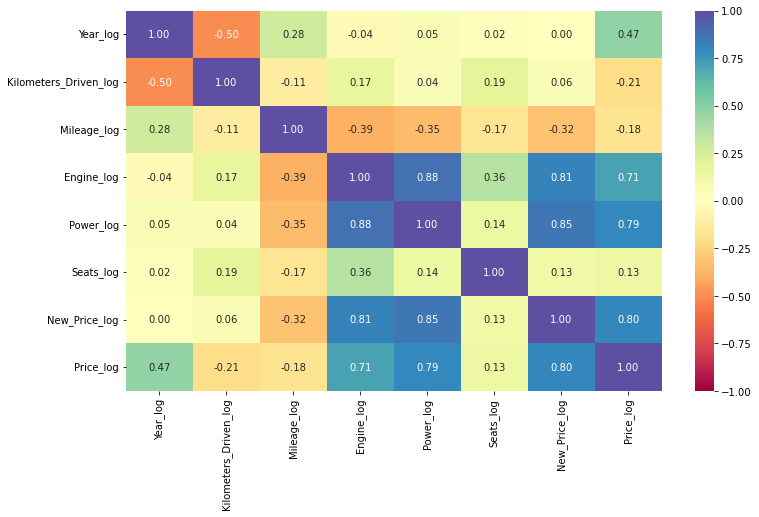

<IPython.core.display.Javascript object>

In [87]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df_trans_Price_log[dist_cols].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

##### Correlation with Price Log attribute

* Year Log has a better correlation with Price log
* New Price Log, Engine Log & Power log have very high correlation with Price log
* New Price Log, Engine Log & Power log are itself highly correlated
* Kilometers driven has a negative correlation with Year & Price log
* Engine Log & Power log have very negative corelation with Mileage

In [88]:
# To display the heat map for the model without Price Log transformation
dist_cols.remove("Price_log")
dist_cols.append("Price")
dist_cols

['Year_log',
 'Kilometers_Driven_log',
 'Mileage_log',
 'Engine_log',
 'Power_log',
 'Seats_log',
 'New_Price_log',
 'Price']

<IPython.core.display.Javascript object>

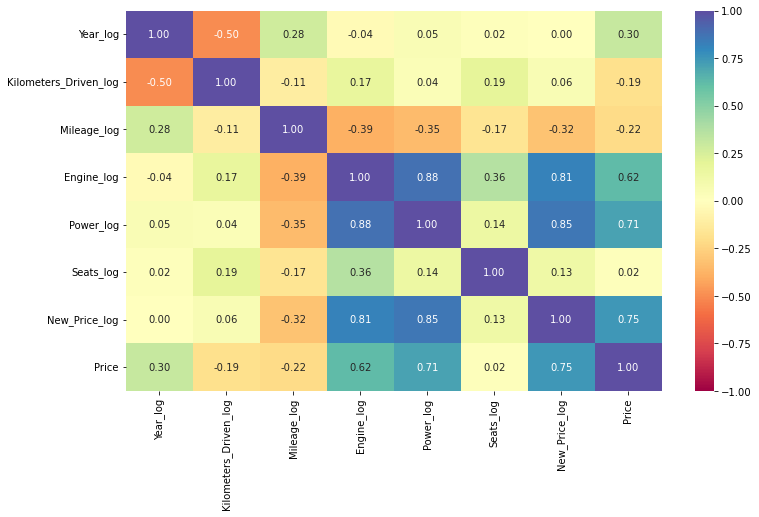

<IPython.core.display.Javascript object>

In [89]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df_trans_Price[dist_cols].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.show()

#### Correlation with Price attribute

* Year Log has a better correlation with Price log
* New Price Log, Engine Log & Power log have very high correlation with Price log
* New Price Log, Engine Log & Power log are itself highly correlated
* Kilometers driven has a negative correlation with Year & Price log
* Engine Log & Power log have very negative corelation with Mileage


### Observation - Post Variable Transformation

- **When compairing the Heat maps before & after log transformation, the correlation is better when the log transformation is done to the Price attribute than with the original Price attribute. We will validate the performance over the model to confirm the same**

---

## Model Building

### Processing the Model by defining the dependent variable - With Price attribute

In [90]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [91]:
X = df_trans_Price.drop(["Price"], axis=1)  # copy of the new dataframe
y = df_trans_Price["Price"]

<IPython.core.display.Javascript object>

In [92]:
# Dataframe with the Price column
df_trans_Price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010 entries, 0 to 6009
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               6010 non-null   category
 1   Fuel_Type              6010 non-null   category
 2   Transmission           6010 non-null   category
 3   Owner_Type             6010 non-null   category
 4   Price                  6010 non-null   float64 
 5   Vehicle_Model          6010 non-null   category
 6   Year_log               6010 non-null   float64 
 7   Kilometers_Driven_log  6010 non-null   float64 
 8   Mileage_log            6010 non-null   float64 
 9   Engine_log             6010 non-null   float64 
 10  Power_log              6010 non-null   float64 
 11  Seats_log              6010 non-null   float64 
 12  New_Price_log          6010 non-null   float64 
dtypes: category(5), float64(8)
memory usage: 407.3 KB


<IPython.core.display.Javascript object>

### Creating dummy variables

In [93]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,Seats_log,New_Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Vehicle_Model_Audi,Vehicle_Model_BMW,Vehicle_Model_Bentley,Vehicle_Model_Chevrolet,Vehicle_Model_Datsun,Vehicle_Model_Fiat,Vehicle_Model_Force,Vehicle_Model_Ford,Vehicle_Model_Hindustan,Vehicle_Model_Honda,Vehicle_Model_Hyundai,Vehicle_Model_ISUZU,Vehicle_Model_Isuzu,Vehicle_Model_Jaguar,Vehicle_Model_Jeep,Vehicle_Model_Lamborghini,Vehicle_Model_Land,Vehicle_Model_Mahindra,Vehicle_Model_Maruti,Vehicle_Model_Mercedes-Benz,Vehicle_Model_Mini,Vehicle_Model_Mitsubishi,Vehicle_Model_Nissan,Vehicle_Model_OpelCorsa,Vehicle_Model_Porsche,Vehicle_Model_Renault,Vehicle_Model_Skoda,Vehicle_Model_Smart,Vehicle_Model_Tata,Vehicle_Model_Toyota,Vehicle_Model_Volkswagen,Vehicle_Model_Volvo
0,7.606387,11.184435,3.317816,6.906755,4.080246,1.791759,1.873339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.608871,10.621352,3.028683,7.367077,4.845761,1.791759,2.836737,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.606885,10.736418,2.954910,7.090077,4.496471,1.791759,2.262804,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.607381,11.373675,3.080533,7.130099,4.497139,2.079442,2.507157,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7.607878,10.613271,2.785011,7.585281,4.954418,1.791759,3.991573,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### Split the data into train and test

In [94]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [95]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4207
Number of rows in test data = 1803


<IPython.core.display.Javascript object>

### Fitting a linear model

In [96]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

### Model performance check

In [97]:
# Checking model performance on train set
print("Modeling with Price - Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Modeling with Price - Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.256477,2.973182,0.770805,0.767657,59.389585


<IPython.core.display.Javascript object>

In [98]:
# Checking model performance on test set
print("Modeling with Price - Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Modeling with Price - Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,5.984588,3.067847,0.734092,0.725406,59.430645


<IPython.core.display.Javascript object>

**Observations: For Modeling with Price attribute**

- The train and test $R^2$ are 0.77 and 0.73, indicating that the model explains 77% and 73% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable - 5.2 & 5.9

- This shows that the model is also not overfitting.

- MAE indicates that our current model is able to predict used vehicle price within a mean error of 3.07 on the test set.

- MAPE of 59.4 on the test data means that we are able to predict within ~59% of the Price.


---

### Processing the Model by defining the dependent variable  - With Price attribute applying Log Transformation

In [99]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [100]:
X = df_trans_Price_log.drop(["Price_log"], axis=1)  # copy of the new dataframe
y = df_trans_Price_log["Price_log"]

<IPython.core.display.Javascript object>

In [101]:
# Dataframe with the Price Log column
df_trans_Price_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6010 entries, 0 to 6009
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Location               6010 non-null   category
 1   Fuel_Type              6010 non-null   category
 2   Transmission           6010 non-null   category
 3   Owner_Type             6010 non-null   category
 4   Vehicle_Model          6010 non-null   category
 5   Year_log               6010 non-null   float64 
 6   Kilometers_Driven_log  6010 non-null   float64 
 7   Mileage_log            6010 non-null   float64 
 8   Engine_log             6010 non-null   float64 
 9   Power_log              6010 non-null   float64 
 10  Seats_log              6010 non-null   float64 
 11  New_Price_log          6010 non-null   float64 
 12  Price_log              6010 non-null   float64 
dtypes: category(5), float64(8)
memory usage: 407.3 KB


<IPython.core.display.Javascript object>

### Creating dummy variables

In [102]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year_log,Kilometers_Driven_log,Mileage_log,Engine_log,Power_log,Seats_log,New_Price_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Vehicle_Model_Audi,Vehicle_Model_BMW,Vehicle_Model_Bentley,Vehicle_Model_Chevrolet,Vehicle_Model_Datsun,Vehicle_Model_Fiat,Vehicle_Model_Force,Vehicle_Model_Ford,Vehicle_Model_Hindustan,Vehicle_Model_Honda,Vehicle_Model_Hyundai,Vehicle_Model_ISUZU,Vehicle_Model_Isuzu,Vehicle_Model_Jaguar,Vehicle_Model_Jeep,Vehicle_Model_Lamborghini,Vehicle_Model_Land,Vehicle_Model_Mahindra,Vehicle_Model_Maruti,Vehicle_Model_Mercedes-Benz,Vehicle_Model_Mini,Vehicle_Model_Mitsubishi,Vehicle_Model_Nissan,Vehicle_Model_OpelCorsa,Vehicle_Model_Porsche,Vehicle_Model_Renault,Vehicle_Model_Skoda,Vehicle_Model_Smart,Vehicle_Model_Tata,Vehicle_Model_Toyota,Vehicle_Model_Volkswagen,Vehicle_Model_Volvo
0,7.606387,11.184435,3.317816,6.906755,4.080246,1.791759,1.873339,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7.608871,10.621352,3.028683,7.367077,4.845761,1.791759,2.836737,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,7.606885,10.736418,2.954910,7.090077,4.496471,1.791759,2.262804,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.607381,11.373675,3.080533,7.130099,4.497139,2.079442,2.507157,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,7.607878,10.613271,2.785011,7.585281,4.954418,1.791759,3.991573,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<IPython.core.display.Javascript object>

### Split the data into train and test

In [103]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

<IPython.core.display.Javascript object>

In [104]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4207
Number of rows in test data = 1803


<IPython.core.display.Javascript object>

### Fitting a linear model

In [105]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

<IPython.core.display.Javascript object>

### Model performance check

In [106]:
# Checking model performance on train set
print("Modeling with Price log transformation - Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_train_perf

Modeling with Price log transformation - Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.512195,1.550427,0.897677,0.896272,13.358952


<IPython.core.display.Javascript object>

In [107]:
# Checking model performance on test set
print("Modeling with Price log transformation - Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model, x_test, y_test)
lin_reg_model_test_perf

Modeling with Price log transformation - Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.462374,1.6668,0.852159,0.84733,15.617629


<IPython.core.display.Javascript object>

**Observations: For Modeling with Price Log Transformation attribute**

- The train and test $R^2$ are 0.94 and 0.92, indicating that the model explains 94% and 92% of the total variation in the train and test sets respectively. Also, both scores are comparable.

- RMSE values on the train and test sets are also comparable - 0.178 & 0.199

- This shows that the model is not overfitting.

- MAE indicates that our current model is able to predict used vehicle price within a mean error of 0.14 on the test set.

- MAPE of 8.07 on the test data means that we are able to predict within ~8% of the Price.

---

## Conclusions

### Key Insights

* Mahindra XUV500 W8 2WD was the highest selling vechile while Maruthi models were the overall highest selling types
* Mumbai location had the highest sales among the 11 different locations
* Cars sold were manufactured during the period  1996 to 2019 year of manufacture, with 50% manufactured before 2014
* Diesel seems to be the fuel types highly preferred among the Fuel types
* Manual transmission vehicles are more preferred than Automatic transmissions
* Vechiles with only one/first owner type are selling more than the multiple owner type
* 5 seater vechiles are mostly preferred than the others
* Engine & Power are negative correlated with Mileage which proves the fact that when the engine power is more then the mileage reduces


### With Price attribute as a reference

* The Year of manufacture has medium effect
* Kilometers driven has negative effect. Increase in Kilometers driven reduces the price
* High powered Engine/Power vechiles are pricy and most of the cars sold are vehicles with average engines/power
* Number of seats has very less effect on the price
* New car Prices also drives the used car prices and related
* Diesel vehicles & Manual transmissions have higher kilometers driving capacity
* Automatic cars had higher prices and dimnishing as more kms driven when copared with manual cars
* Mileage of vehicles has very less effect on the price. There are not linerally distributed


### Model Prediction

- We have been able to build a predictive model that can be used by sales agent to predict the used car Price using two models:
        **For Modeling with Price Log Transformation attribute** - train and test $R^2$ are 0.94 and 0.92
        **For Modeling with Price attribute** - train and test $R^2$ are 0.77 and 0.73
        
Compairing the Performance Regression parameters - 'Modeling with Price' vs **'Modeling with Price Log Transformed Model'**, the model with **Price Log Transformed Model** has better performance - train and test $R^2$ are 0.94 and 0.92. Also, the RMSE is low with high accuracy of the prediction and  MAPE is very low which means that the measure of errors are very less. 

**Training Data:**

	RMSE		MAE			R-squared	Adj. R-squared	MAPE
	0.17816		0.131315	0.943174		0.942394		7.59758

**Testing Data:**

	RMSE		MAE		R-squared	Adj. R-squared	MAPE
	0.198751	0.137343	0.929665		0.927367	8.059457

---

In [108]:
# Generating the coefficients and intercept of the model

coef_df = pd.DataFrame(
    np.append(lin_reg_model.coef_, lin_reg_model.intercept_),
    index=x_train.columns.tolist() + ["Intercept"],
    columns=["Coefficients"],
)

coef_df

,Coefficients
Year_log,1.820710e+02
Kilometers_Driven_log,-7.535652e-02
Mileage_log,-5.776898e-02
Engine_log,2.319007e-01
Power_log,4.807945e-01
Seats_log,1.274178e-01
New_Price_log,2.942724e-01
Location_Bangalore,1.306726e-01
Location_Chennai,3.292908e-02
Location_Coimbatore,9.732693e-02


<IPython.core.display.Javascript object>

* The below equation can be used to calculate the Used Car Price

In [109]:
# The equation of linear regression for the Price

Equation = "Price = " + str(lin_reg_model.intercept_)
print(Equation, end=" ")

for i in range(len(x_train.columns)):
    if i != len(x_train.columns) - 1:
        print(
            "+ (", lin_reg_model.coef_[i], ")*(", x_train.columns[i], ")", end="  ",
        )
    else:
        print("+ (", lin_reg_model.coef_[i], ")*(", x_train.columns[i], ")")

Price = -1386.737407191359 + ( 182.0709724604415 )*( Year_log )  + ( -0.0753565172824559 )*( Kilometers_Driven_log )  + ( -0.05776897796088171 )*( Mileage_log )  + ( 0.23190066293371986 )*( Engine_log )  + ( 0.480794459023011 )*( Power_log )  + ( 0.12741775274022366 )*( Seats_log )  + ( 0.2942723705896387 )*( New_Price_log )  + ( 0.13067264683461455 )*( Location_Bangalore )  + ( 0.03292907592524716 )*( Location_Chennai )  + ( 0.09732693201193099 )*( Location_Coimbatore )  + ( -0.07762614628160766 )*( Location_Delhi )  + ( 0.10465318963060025 )*( Location_Hyderabad )  + ( -0.020350963072902246 )*( Location_Jaipur )  + ( -0.02411991081625682 )*( Location_Kochi )  + ( -0.2053288818658246 )*( Location_Kolkata )  + ( -0.05903635851704313 )*( Location_Mumbai )  + ( -0.030347029376829766 )*( Location_Pune )  + ( 0.07248749646447569 )*( Fuel_Type_Diesel )  + ( -8.465450562766819e-16 )*( Fuel_Type_Electric )  + ( 0.04450677201925905 )*( Fuel_Type_LPG )  + ( -0.05476652535005504 )*( Fuel_Type_Pe

<IPython.core.display.Javascript object>

---